## Preamble

In [8]:
SetDirectory["~/Documents/Univ/NANOGrav2PBH"];

In [9]:
SetOptions[{Plot,LogPlot,LogLinearPlot,LogLogPlot},
           {ImageSize->Large,
            Frame->True,
            LabelStyle->Directive[Black,Large,FontFamily->"Palatino"],
            PlotStyle->AbsoluteThickness[3]}];
SetOptions[{ListPlot,ListLogPlot,ListLogLinearPlot,ListLogLogPlot},
           {ImageSize->Large,
            Frame->True,
            LabelStyle->Directive[Black,Large,FontFamily->"Palatino"],
            PlotStyle->AbsoluteThickness[3],
            Joined->True}];
SetOptions[{ParametricPlot},
           {ImageSize->Large,
            Frame->True,
            LabelStyle->Directive[Black,Large,FontFamily->"Palatino"],
            PlotStyle->AbsoluteThickness[3],
            AspectRatio->1/GoldenRatio}];
SetOptions[{ContourPlot},
            {ImageSize->Large
            ,Frame->True
            ,LabelStyle->Directive[Black,Large,FontFamily->"Palatino"]
            ,AspectRatio->1/GoldenRatio}];
RGBData = {"#5E81B5","#E19C24","#8FB032","#EB6235","#8778B3","#C56E1A","#5D9EC7","#FFBF00","#A5609D","#929600","#E95536","#6685D9","#F89F13","#BC5B80","#47B66D"};
Color = Map[RGBColor,RGBData];

# Gaussian

k Sin[k r]
-(----------)
      r
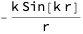

In [7]:
Simplify[D[r^2 D[Sin[k r]/k/r,r],r]/r^2]

## monochromatic

n
Sqrt[As] ks
  -5 + 2 n
ks         Sin[ks r]
--------------------
         r
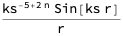

In [12]:
sigman[n_,ks_,As_] = ks^n Sqrt[As]
psin[n_,r_,ks_] = ks^(2n-4) Sin[ks r]/(ks r)

In [19]:
gamma3 = sigman[3,ks,As]^2/sigman[2,ks,As]/sigman[4,ks,As]
Rb[ks_] = Sqrt[3]sigman[3,ks,As]/sigman[4,ks,As]

1
Sqrt[3]
-------
  ks

## log-normal

In [7]:
calPs[k_,ks_,As_,sg_] = As/Sqrt[2\[Pi]]/sg Exp[-(Log[k]-Log[ks])^2/2/sg^2];
Simplify[Integrate[calPs[k,ks,As,sg] 1/k,{k,0,Infinity}],{sg>0}]

As

In [9]:
sigman[n_,ks_,As_,sg_] = Simplify[Sqrt[Integrate[k^(2n) calPs[k,ks,As,sg] 1/k,{k,0,Infinity}]],{sg>0,ks>0,n>0}]

2   2
          n  sg    n
Sqrt[As] E       ks

In [ ]:
psin[n_,r_,ks_,sg_] = 1/sigman[2,ks,As,sg]^2 Integrate[k^(2n) Sin[k r]/(k r) calPs[k,ks,As,sg] 1/k,{k,0,Infinity}]

3 (2 + Sqrt[E])
---------------
 Sqrt[2 E Pi]
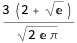

In [10]:
normN = Simplify[Sum[calPs[E^logk,ks,As,sg],{logk,Log[ks]-sg,Log[ks]+sg,sg}] 3sg,{ks>0,sg>0}] /. {As->1}

-5 + 2 n
ks         Sin[ks r]      -5 + 2 n   2
-------------------- - (ks         sg  
         r
 
>      (ks r Cos[ks r] - 4 ks n r Cos[ks r] + 15 Sin[ks r] + 8 Sqrt[E] Sin[ks r] + 
 
                            2               2  2
>        4 n Sin[ks r] - 4 n  Sin[ks r] + ks  r  Sin[ks r])) / ((2 + Sqrt[E]) r)
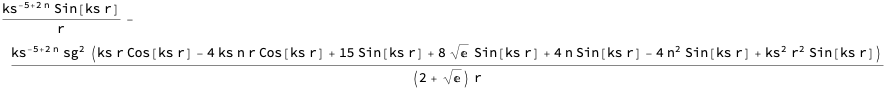

In [11]:
psin[n_,r_,ks_,sg_] = Normal[Series[Simplify[1/normN/sigman[2,ks,As,sg]^2 Sum[Exp[2n logk] Sin[E^logk r]/E^logk/r calPs[E^logk,ks,As,sg]
    ,{logk,Log[ks]-sg,Log[ks]+sg,sg}] 3sg,{sg>0,ks>0}],{sg,0,2}]]

In [12]:
gamma3[sg_] = sigman[3,ks,As,sg]^2/sigman[2,ks,As,sg]/sigman[4,ks,As,sg]

2
 -2 sg
E

Sqrt[3]
---------
     2
 7 sg
E      ks
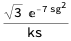

In [13]:
Rb[ks_,sg_] = Sqrt[3]sigman[3,ks,As,sg]/sigman[4,ks,As,sg]

2     2
(mu2 (-4 ks (-kb  + ks ) r Cos[ks r] + 
 
                              2                       2
>       ((-12 - 10 Sqrt[E]) kb  + (20 + 14 Sqrt[E]) ks ) Sin[ks r])) / 
 
                       5
>   (4 (2 + Sqrt[E]) ks  r)
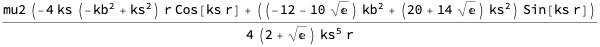

In [14]:
zetabar[r_,ks_,mu2_,kb_] = Normal[Series[Simplify[mu2/(1-gamma3[sg]^2)(psin[1,r,ks,sg] - 1/3 Rb[ks,sg]^2 psin[2,r,ks,sg]) - 
    mu2 kb^2 sigman[2,ks,As,sg]/sigman[4,ks,As,sg]/gamma3[sg]/(1-gamma3[sg]^2)(gamma3[sg]^2 psin[1,r,ks,sg] - 1/3 Rb[ks,sg]^2 psin[2,r,ks,sg]),{As>0,sg>0}],{sg,0,2}]] /. {sg->0}

mu2 (2 ks r Cos[ks r] - (6 + 5 Sqrt[E]) Sin[ks r])
--------------------------------------------------
                               4
               (2 + Sqrt[E]) ks  r
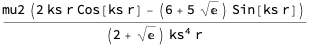

In [15]:
D[zetabar[r,ks,mu2,kb],kb] /. {kb->ks} // Simplify

mu2 Sin[ks r]
-------------
      3
    ks  r
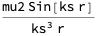

In [16]:
zetaks[r_,ks_,mu2_] = zetabar[r,ks,mu2,ks] // Simplify

mu Sin[x]
---------
    x
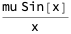

In [17]:
zetax[x_,mu_] = zetaks[x/ks,ks,mu ks^2] // Simplify

2                                2
x  - (x + mu x Cos[x] - mu Sin[x])
-----------------------------------
                  2
               3 x
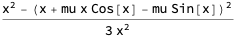

In [18]:
CompactC[x_,mu_] = 1/3 (1-(1+x D[zetax[x,mu],x])^2) // Simplify

-Graphics-
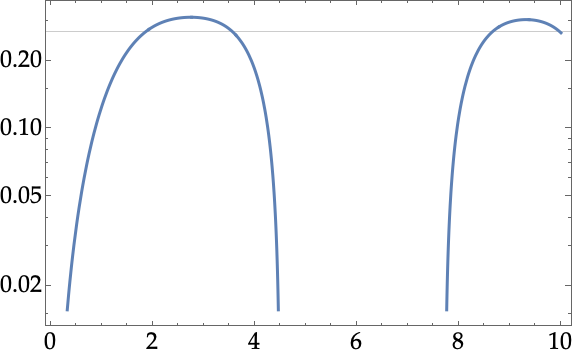

In [19]:
LogPlot[CompactC[x,0.7],{x,0.1,10},GridLines->{None,{0.267}}]

mu Sin[x]
1 + mu Cos[x] - ---------
                    x
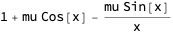

In [20]:
rmcond2[x_,mu_] = 1+x D[zetax[x,mu],x] // Simplify

-Graphics-
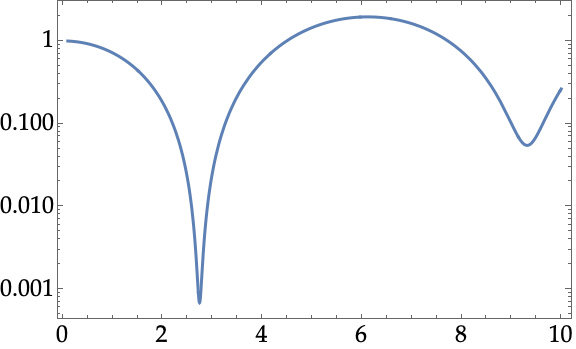

In [21]:
LogPlot[rmcond2[x,0.94],{x,0.1,10}]

In [22]:
rmcond[x_] = -x^2/mu (D[zetax[x,mu],x]+x D[zetax[x,mu],{x,2}]) // Simplify

2
x Cos[x] + (-1 + x ) Sin[x]

-Graphics-
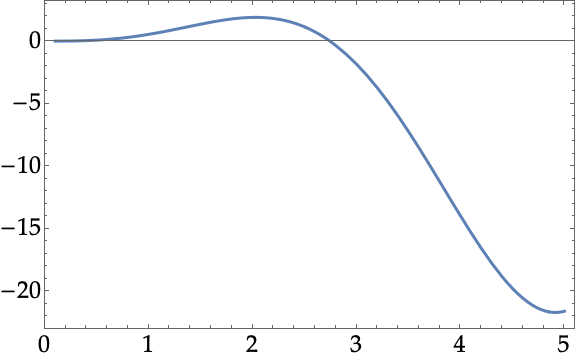

In [23]:
Plot[rmcond[x],{x,0.1,5}]

In [24]:
xm = x /. FindRoot[rmcond[x]==0,{x,3}]

2.74371

In [25]:
CompactC[xm,mu] // Simplify

2
0. + 0.708736 mu - 0.37673 mu

2
          x (x Cos[x] - Sin[x] + Sqrt[-((-1 + 3 Cth) (-(x Cos[x]) + Sin[x]) )])
{{mu -> -(---------------------------------------------------------------------)}, 
                                                       2
                                 (-(x Cos[x]) + Sin[x])
 
                                                                              2
             x (x Cos[x] - Sin[x] - Sqrt[-((-1 + 3 Cth) (-(x Cos[x]) + Sin[x]) )])
>   {mu -> -(---------------------------------------------------------------------)}}
                                                          2
                                    (-(x Cos[x]) + Sin[x])
{{mu -> 0.521027}, {mu -> 1.36026}}
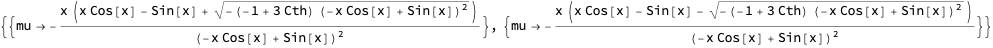

In [26]:
Simplify[Solve[CompactC[x,mu] == Cth,mu]]
Simplify[Solve[CompactC[x,mu] == Cth,mu]] /. {x->xm,Cth->0.267}

In [28]:
xm/(6.4 10^-14)

13
4.28704 10

In [29]:
Sin[xm]/xm
2 Sin[xm]/xm

0.141221
0.282443

In [31]:
f[z_] = 1/2 z(z^2-3)(Erf[1/2 Sqrt[5/2]z]+Erf[Sqrt[5/2]z]) + 
    Sqrt[2/5/\[Pi]]((8/5+31/4 z^2)Exp[-5/8 z^2] + (-8/5+1/2 z^2)Exp[-5/2 z^2] );

-Graphics-
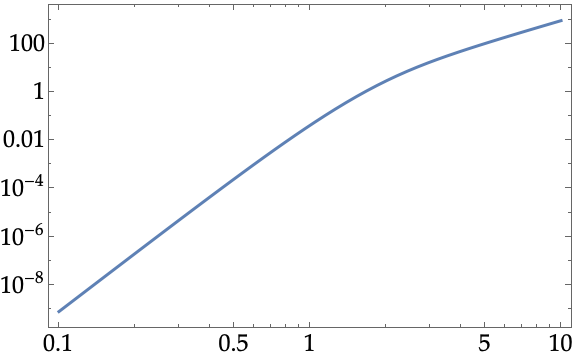

In [32]:
LogLogPlot[f[z],{z,0.1,10}]

-Graphics-
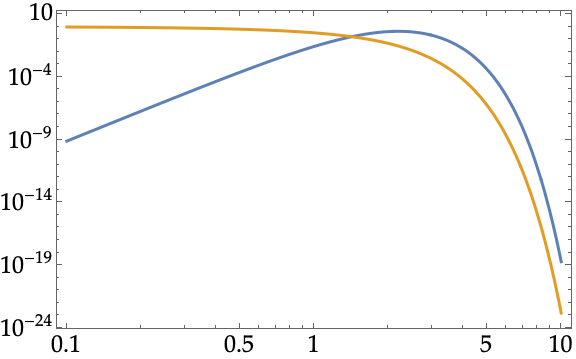

In [34]:
LogLogPlot[{f[z]Exp[-z^2/2],Erfc[z/Sqrt[2]]},{z,0.1,10}]

In [51]:
gineV = (1.783 10^-33)^-1;
MpcinvineV = (10^6 3.086 10^16)^-1 1.973 10^-7;
KineV = (1.16 10^4)^-1;
MplineV = 2.435 10^(18+9);
kminvsinvMpcineV = 10^3 6.582 10^-16 / (3.086 10^16 10^6);

In [56]:
(1/0.12 1/(2.4 10^4) 10^20 gineV (3/2/\[Pi])^(3/2) (4.3 10^13 MpcinvineV)^3 / 
(\[Pi]^2/30 3.38 (2.725 KineV)^4 0.28) )^-1

-18
7.10265 10

In [60]:
(10^20 gineV (3/2/\[Pi])^(3/2) (4.3 10^13 MpcinvineV)^3 / (0.12 3 MplineV^2 (100 kminvsinvMpcineV)^2 0.28) )^-1

-18
7.07168 10

In [44]:
mu2[M_] = Log[M/10^20]/0.28;

In [45]:
PG[x_,sg2_] = 1/Sqrt[2\[Pi] sg2] Exp[-x^2/2/sg2];

In [46]:
mu2th = 0.521;

In [58]:
fPBH[M_,As_] = (M/10^20) (f[mu2[M]/Sqrt[As]]PG[mu2[M],As] /(7.1 10^-18) ) UnitStep[mu2[M]-mu2th];

In [59]:
mu2[1.2 10^20]

0.651148

In [66]:
fPBH[10^19,3 10^-3]
fPBH[1.16 10^20,2.5 10^-3]

`1` is too small to represent as a normalized machine number; precision may be lost.: Exp[-11271.] is too small to represent as a normalized machine number; precision may be lost.

`1` is too small to represent as a normalized machine number; precision may be lost.: Exp[-56355.2] is too small to represent as a normalized machine number; precision may be lost.

`1` is too small to represent as a normalized machine number; precision may be lost.: Exp[-14088.8] is too small to represent as a normalized machine number; precision may be lost.

Further output of `1` will be suppressed during this calculation.: Further output of General::munfl will be suppressed during this calculation.

0.
0.000594621

`1` is too small to represent as a normalized machine number; precision may be lost.: Exp[-1094.13] is too small to represent as a normalized machine number; precision may be lost.

`1` is too small to represent as a normalized machine number; precision may be lost.: Exp[-5470.66] is too small to represent as a normalized machine number; precision may be lost.

`1` is too small to represent as a normalized machine number; precision may be lost.: Exp[-1367.67] is too small to represent as a normalized machine number; precision may be lost.

Further output of `1` will be suppressed during this calculation.: Further output of General::munfl will be suppressed during this calculation.

-Graphics-
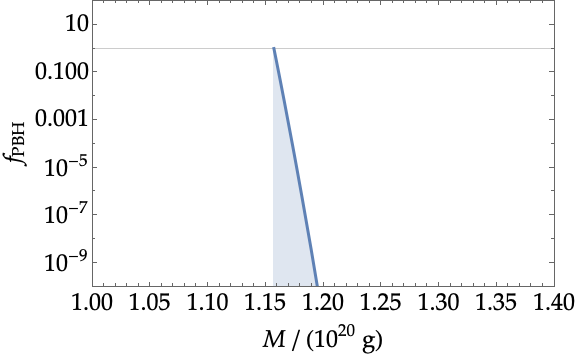

In [69]:
FigfPBH = 
LogPlot[fPBH[M 10^20,2.8 10^-3],{M,0.5,2},GridLines->{None,{1}},PlotRange->{{1,1.4},{10^-10,100}}
    ,Filling->Bottom,FrameLabel->{Row[{M," / (",Superscript[10,20]," g)"}],Subscript[f,"PBH"]}]

In [70]:
Export["fPBH_mono.pdf",FigfPBH];

## k-Gauss

In [11]:
calPs[k_,ks_,As_,sg_] = As k/Sqrt[2\[Pi]]/sg Exp[-(k-ks)^2/2/sg^2] 2/(1+Erf[ks/Sqrt[2]/sg]);
Simplify[Integrate[calPs[k,ks,As,sg] 1/k,{k,0,Infinity}],{sg>0,As>0}]

As

2
       n      -1 + 2 n                                            1      3  -ks
Sqrt[(2  As sg         (Sqrt[2] ks Gamma[1 + n] Hypergeometric1F1[- - n, -, -----] + 
                                                                  2      2      2
                                                                            2 sg
 
                                                      2
                   1                            1  -ks                     ks
>         sg Gamma[- + n] Hypergeometric1F1[-n, -, -----])) / (1 + Erf[----------])] / 
                   2                            2      2               Sqrt[2] sg
                                                   2 sg
 
      1/4
>   Pi
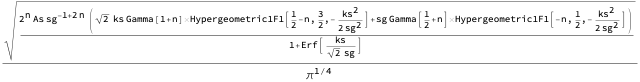

In [14]:
sigman[n_,ks_,As_,sg_] = FullSimplify[Sqrt[Integrate[k^(2n) calPs[k,ks,As,sg] 1/k,{k,0,Infinity}]],{sg>0,ks>0,n>0}]

In [ ]:
psin[n_,r_,ks_,sg_] = 1/sigman[2,ks,As,sg]^2 Integrate[k^(2n) Sin[k r]/(k r) calPs[k,ks,As,sg] 1/k,{k,0,Infinity}]

In [17]:
gamma3LN[sg_] = Simplify[sigmaLN[3,ks,As,sg]^2/sigmaLN[2,ks,As,sg]/sigmaLN[4,ks,As,sg],{As>0,sg>0,ks>0}]

2
 -2 sg
E

2
kb  mu2 Sin[ks r]
-----------------
        5
      ks  r
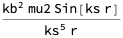

In [24]:
zetabar[r_,ks_,mu2_,kb_] = Simplify[mu2/(1-gamma3LN[sg]^2)(psin[1,r,ks] - 1/3 Rb[ks]^2 psin[2,r,ks]) - 
    mu2 kb^2 sigman[2,ks,As]/sigman[4,ks,As]/gamma3/(1-gamma3LN[sg]^2)(gamma3LN[sg]^2 psin[1,r,ks] - 1/3 Rb[ks]^2 psin[2,r,ks]),{As>0,sg>0}]

In [22]:
mu2/(1-gamma3LN[sg]^2)(psin[1,r,ks] - 1/3 Rb[ks]^2 psin[2,r,ks])

0

## scale-invariant

n      As
kW  Sqrt[--]
         n
------------
  Sqrt[2]
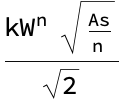

In [15]:
sigman[n_,kW_] = Simplify[Sqrt[As Integrate[Exp[2n logk],{logk,-Infinity,logkW}] /. {logkW->Log[kW]}], {kW>0, n>0}]

2  2
    -4 + 2 n                         3          -(kW  r )
2 kW         HypergeometricPFQ[{n}, {-, 1 + n}, ---------]
                                     2              4
----------------------------------------------------------
                            n
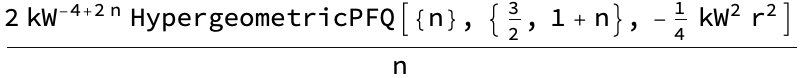

In [16]:
psin[n_,r_,kW_] = FullSimplify[1/sigman[2,kW]^2 As Integrate[k^(2n) Sin[k r]/k/r 1/k, {k,0,kW}],{Element[n,PositiveIntegers],kW>0,r>0}]

4 - 4 Cos[kW r]
---------------
      4  2
    kW  r
              2  2
-8 + (8 - 4 kW  r ) Cos[kW r] + 8 kW r Sin[kW r]
------------------------------------------------
                       4  4
                     kW  r
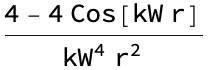
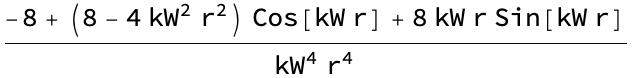

In [17]:
psin[1,r,kW] // Simplify
psin[2,r,kW] // Simplify

-Graphics-
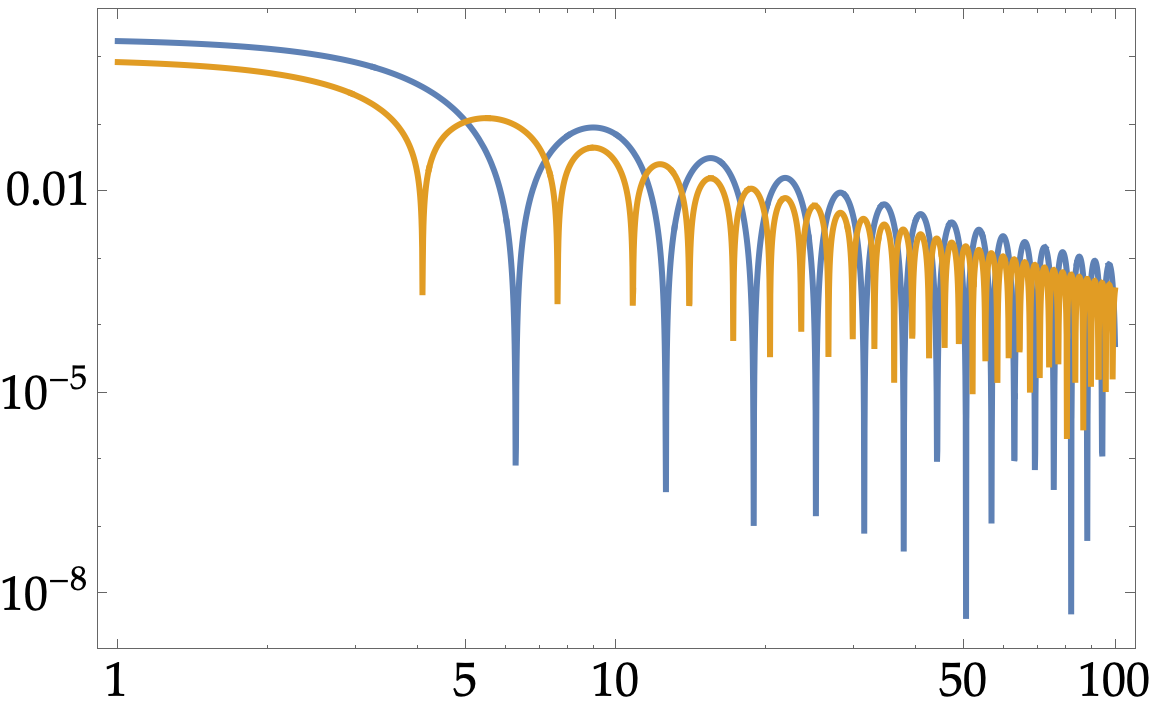

In [51]:
LogLogPlot[{psin[1,r,1],Abs[psin[2,r,1]]},{r,1,100}]

2 Sqrt[2]
---------
    3
2
--
kW
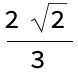
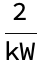

In [19]:
gamma3 = sigman[3,kW]^2/sigman[2,kW]/sigman[4,kW]
Rb[kW_] = Sqrt[3]sigman[3,kW]/sigman[4,kW]

2       2       2   2  2       4  2
(12 mu2 (-12 kb  + 8 kW  - 4 kb  kW  r  + 3 kW  r  + 
 
           2         2  2        2         2  2
>       (kW  (-8 + kW  r ) - 2 kb  (-6 + kW  r )) Cos[kW r] + 
 
                  2       2                     8  4
>       4 kW (3 kb  - 2 kW ) r Sin[kW r])) / (kW  r )
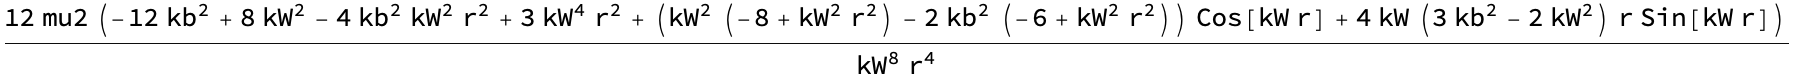

In [21]:
zetabar[r_,kW_,mu2_,kb_] = mu2/(1-gamma3^2)(psin[1,r,kW] - 1/3 Rb[kW]^2 psin[2,r,kW]) - 
    mu2 kb^2 sigman[2,kW]/sigman[4,kW]/gamma3/(1-gamma3^2)(gamma3^2 psin[1,r,kW] - 1/3 Rb[kW]^2 psin[2,r,kW]) // Simplify

-Graphics-
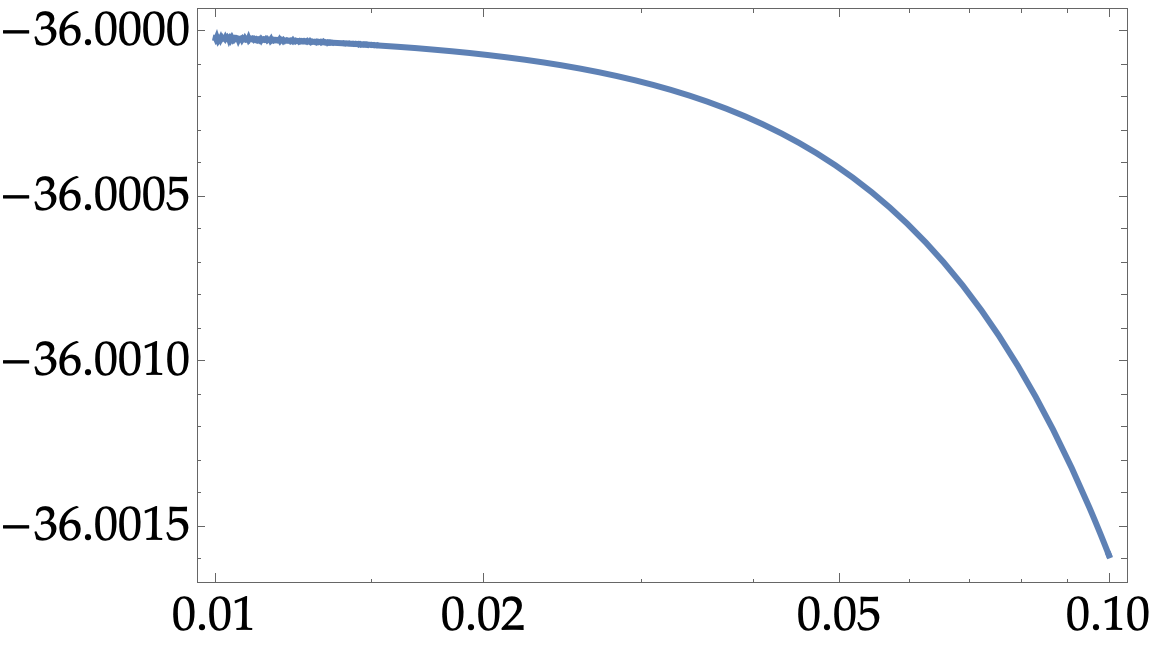

In [55]:
LogLinearPlot[zetabar[r,2,1,10],{r,0.01,0.1},PlotRange->Full]

2      2          2  2         2          2        2
(-12 mu (-8 + 12 kappa  - 3 x  + 4 kappa  x  + (8 - x  + 2 kappa  (-6 + x )) Cos[x] - 
 
                       2                4
>       4 (-2 + 3 kappa ) x Sin[x])) / x
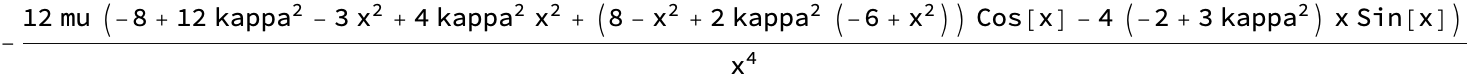

In [22]:
zetax[x_,mu_,kappa_] = zetabar[x/kW,kW,mu kW^2,kappa kW] // Simplify

-Graphics-
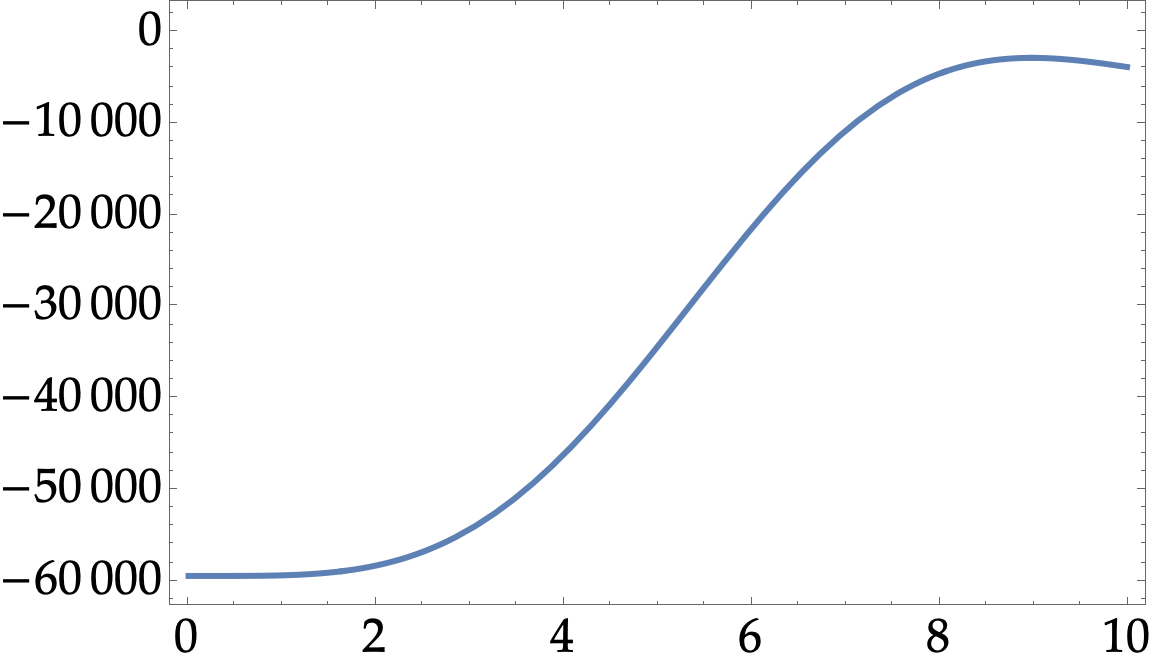

In [57]:
Plot[zetax[x,100,10],{x,0.01,10}]

2             2           2     2    4
(1 - Power[-384 mu + 576 kappa  mu - 72 mu x  + 96 kappa  mu x  + x  + 
 
                        2          2        2
>        24 mu (16 - 5 x  + 8 kappa  (-3 + x )) Cos[x] + 
 
                        2          2         2                 8
>        12 mu x (32 - x  + 2 kappa  (-24 + x )) Sin[x], 2] / x ) / 3
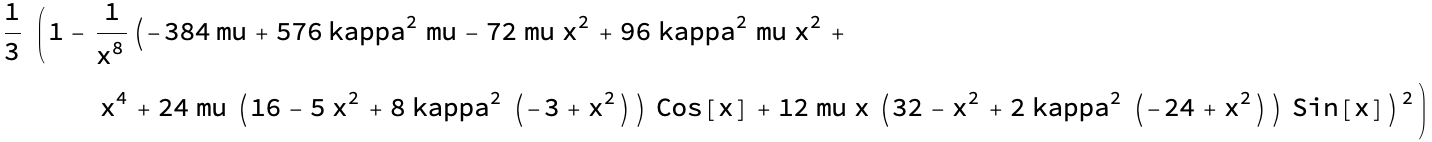

In [23]:
CompactC[x_,mu_,kappa_] = 1/3 (1-(1+x D[zetax[x,mu,kappa],x])^2) // Simplify

-Graphics-
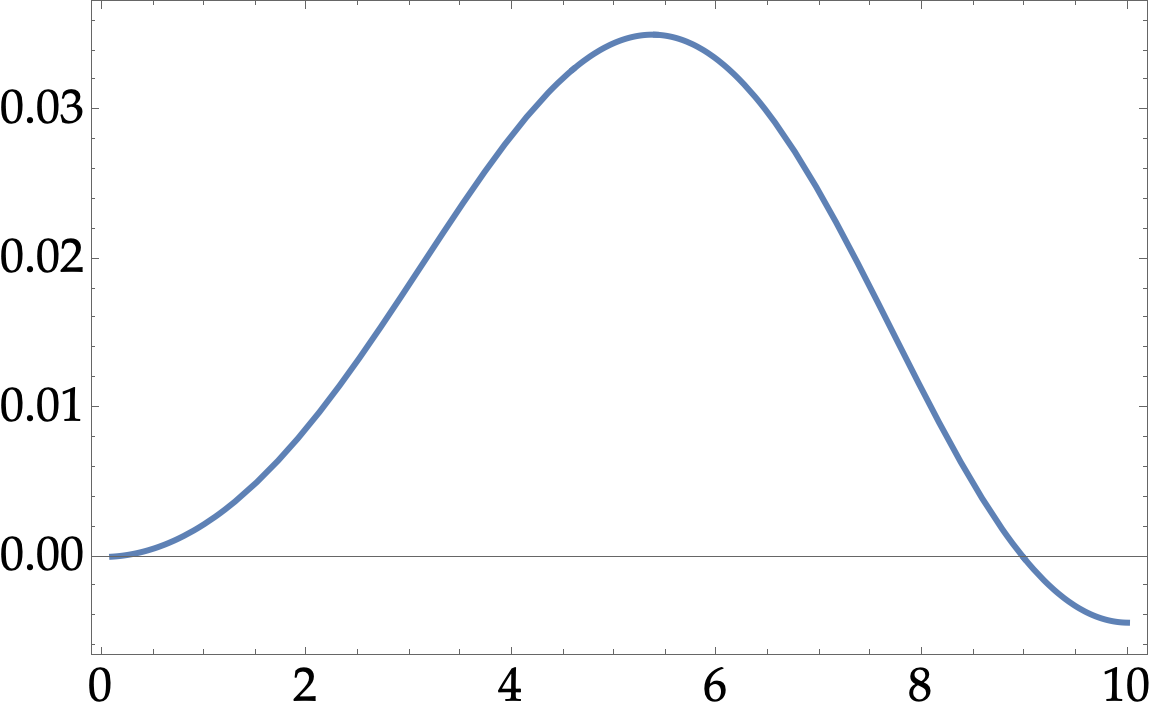

In [59]:
Plot[CompactC[x,0.01,0.01],{x,0.1,10}]

-Graphics-
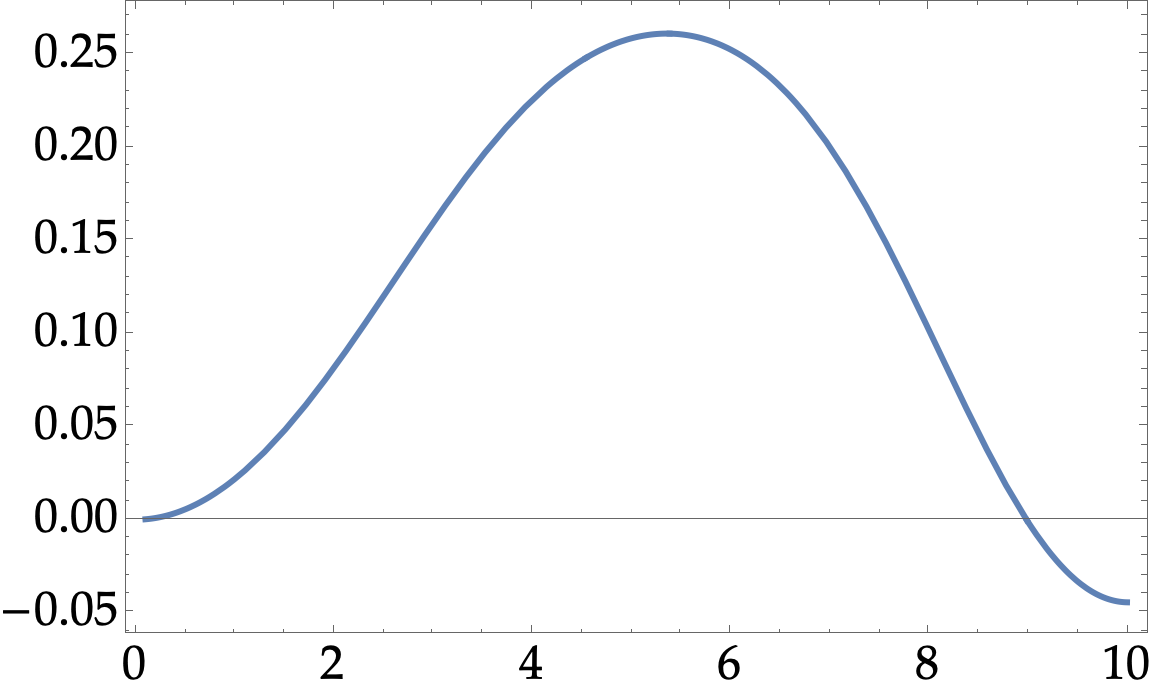

In [60]:
Plot[CompactC[x,0.1,0.1],{x,0.1,10}]

-Graphics-
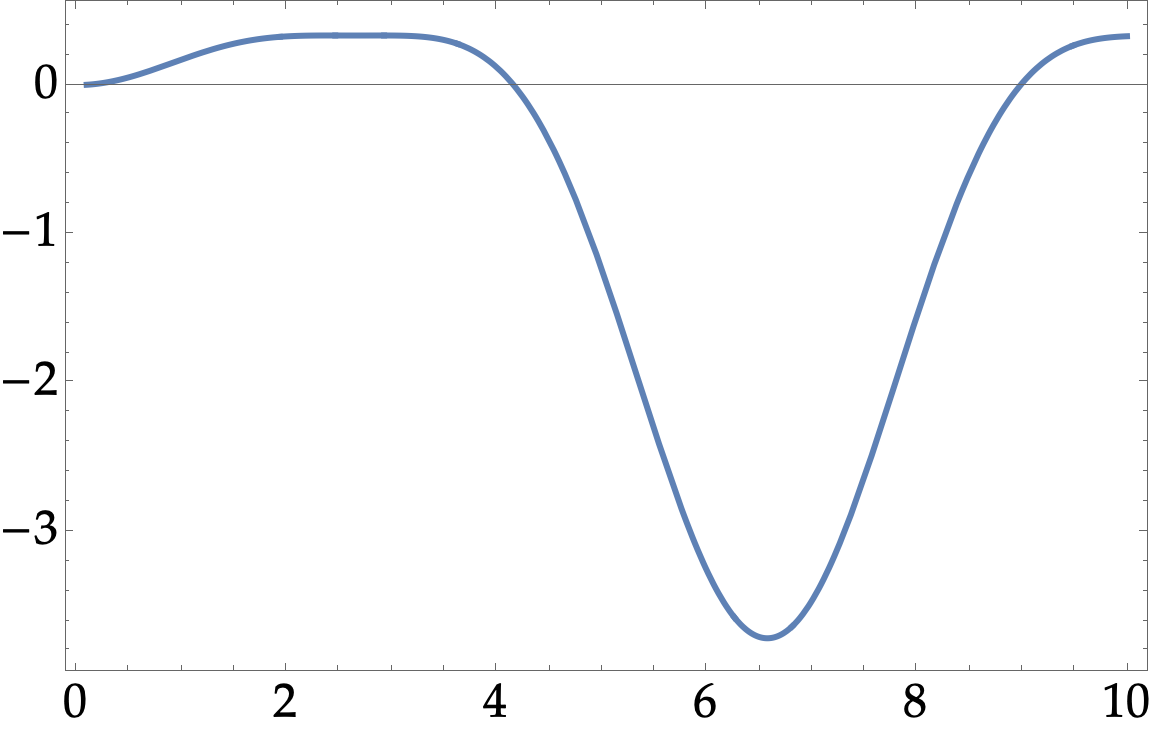

In [61]:
Plot[CompactC[x,1,1],{x,0.1,10}]

-Graphics-
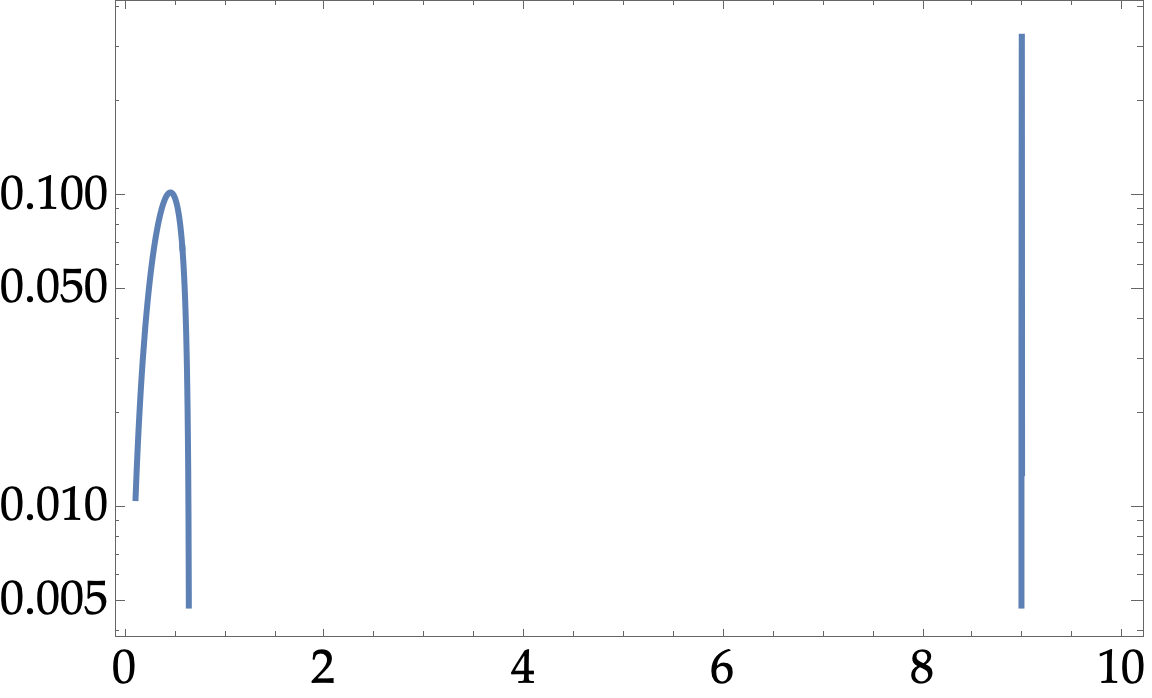

In [62]:
LogPlot[CompactC[x,5,5],{x,0.1,10}]

-Graphics-
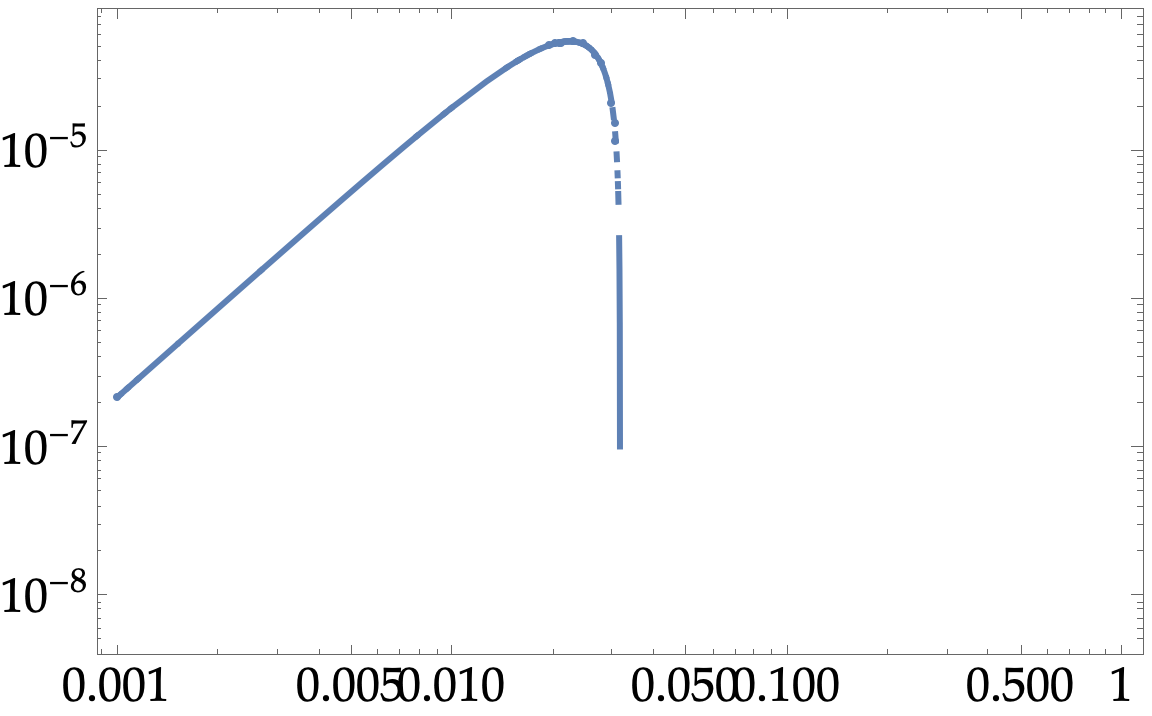

In [63]:
LogLogPlot[CompactC[x,1,100],{x,10^-3,1},PlotRange->Full,WorkingPrecision->30]

2          2        2
4 (32 + 3 x  - 4 kappa  (12 + x )) + 
 
                2    4          2           2    4
>   (-128 + 52 x  - x  + 2 kappa  (96 - 40 x  + x )) Cos[x] - 
 
                 2          2           2
>   x (128 - 11 x  + 6 kappa  (-32 + 3 x )) Sin[x]
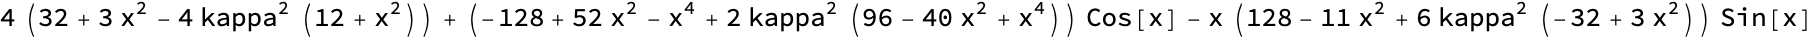

In [24]:
xmcond[x_,kappa_] = (D[zetax[x,mu,kappa],x]+x D[zetax[x,mu,kappa],{x,2}]) x^5/12/mu // Simplify

-Graphics-
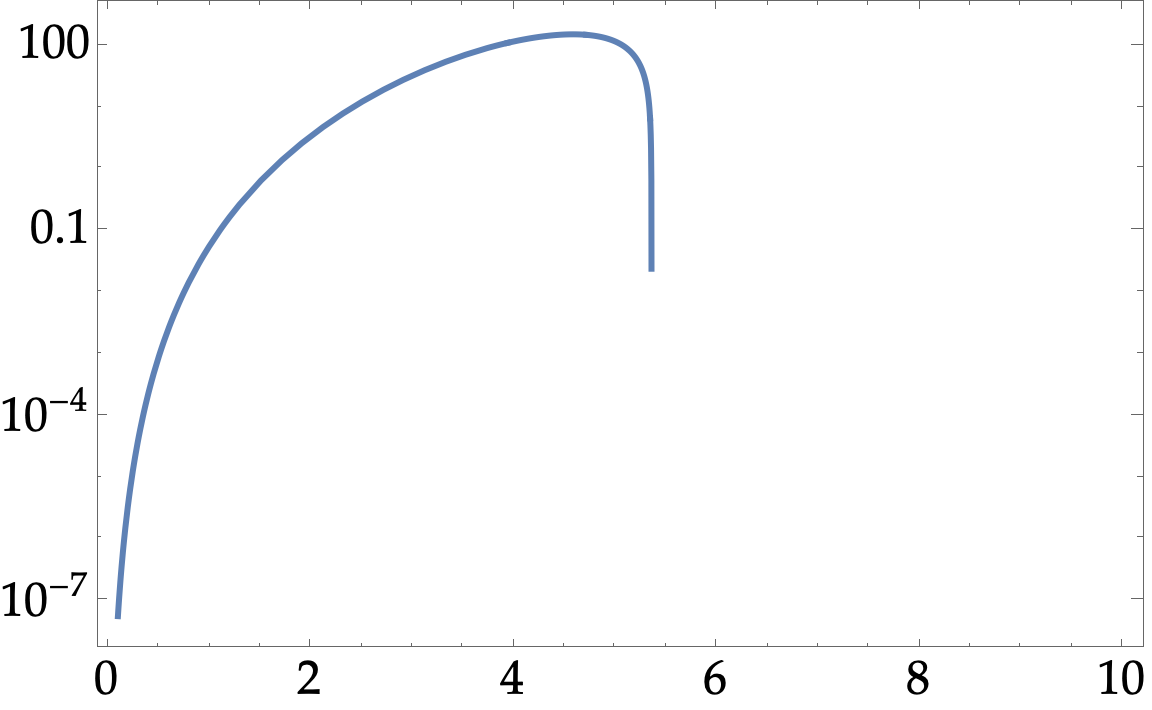

In [65]:
LogPlot[-xmcond[x,0.1],{x,0.1,10},PlotRange->Full]

-Graphics-
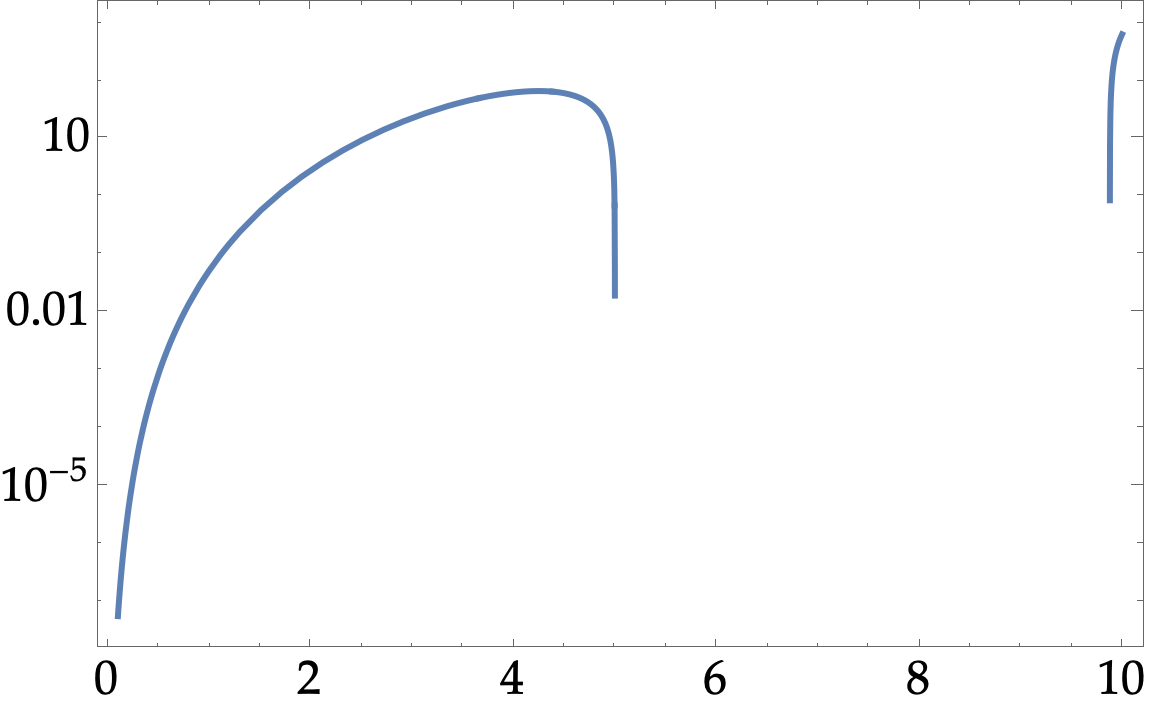

In [66]:
LogPlot[-xmcond[x,0.5],{x,0.1,10},PlotRange->Full]

-Graphics-
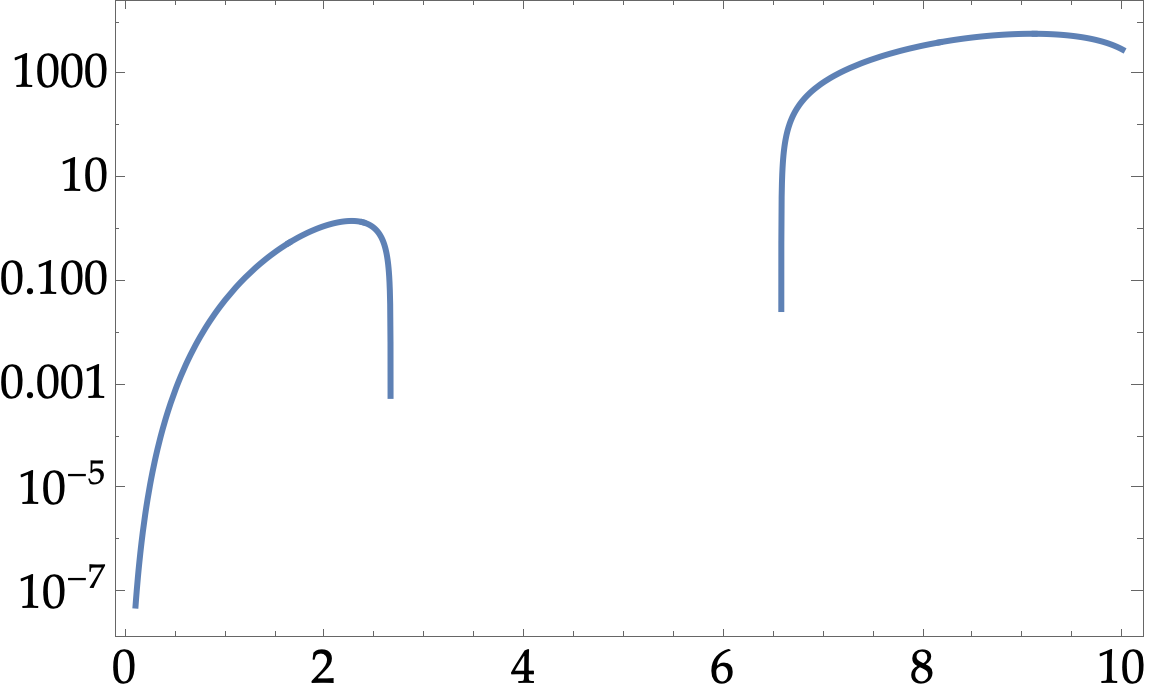

In [67]:
LogPlot[-xmcond[x,1],{x,0.1,10},PlotRange->Full]

-Graphics-
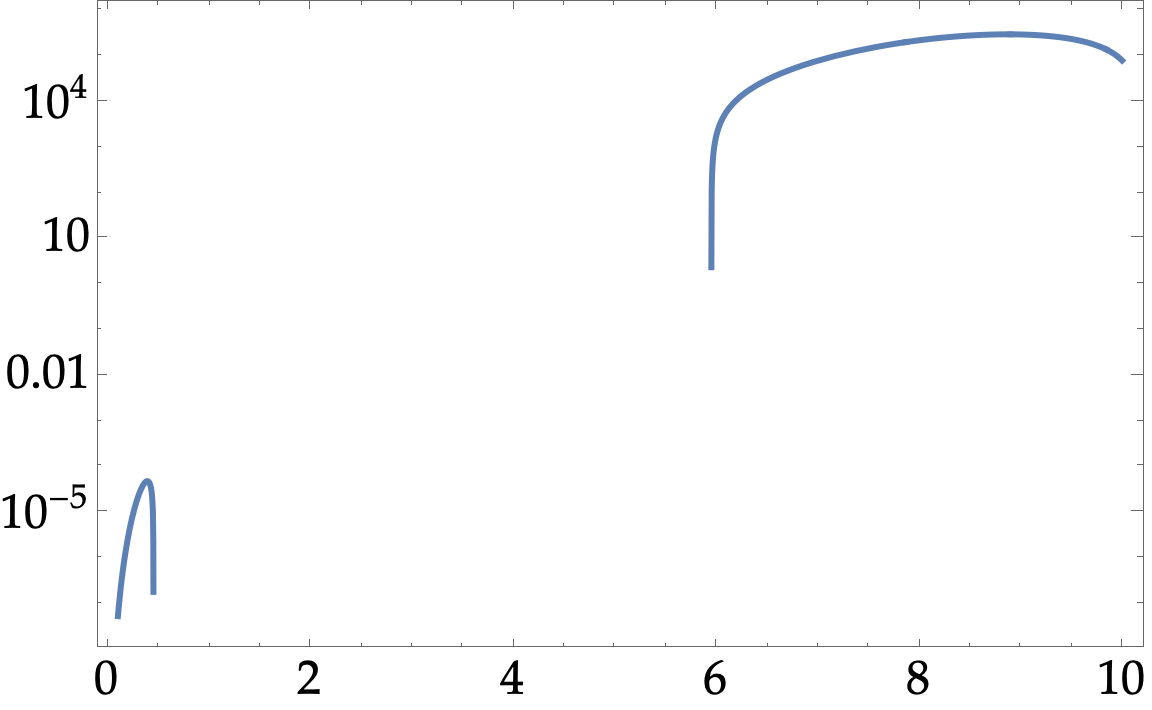

In [68]:
LogPlot[-xmcond[x,5],{x,0.1,10},PlotRange->Full]

-Graphics-
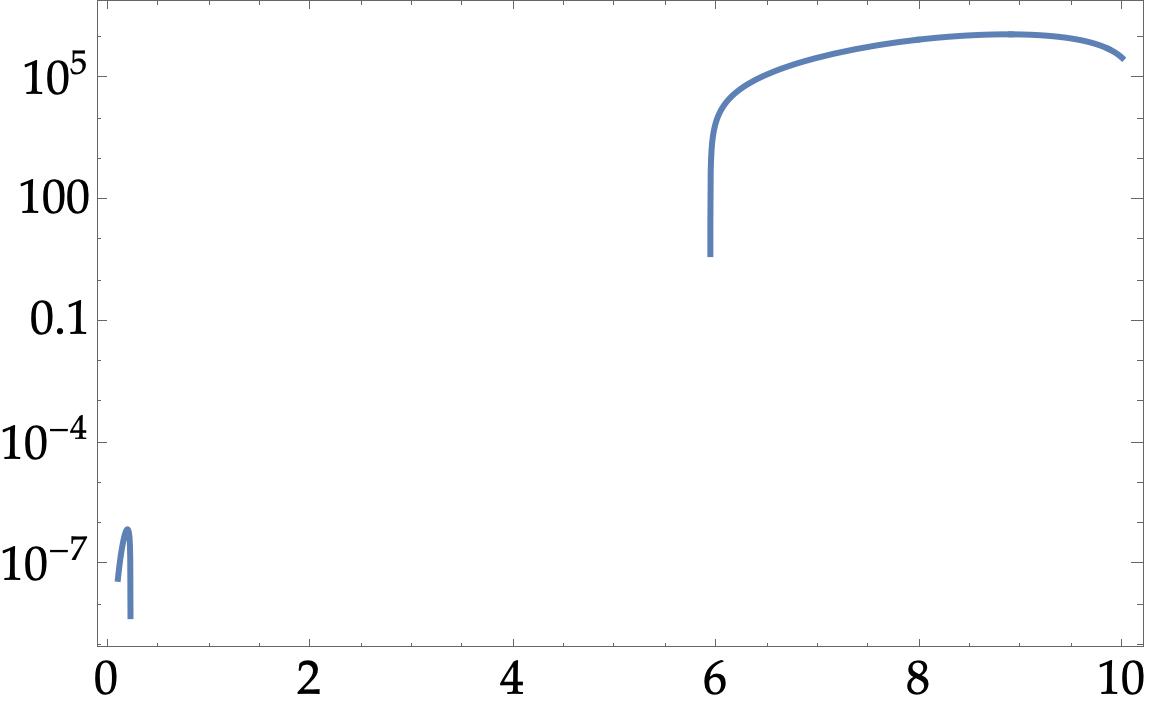

In [69]:
LogPlot[-xmcond[x,10],{x,0.1,10},PlotRange->Full]

-Graphics-
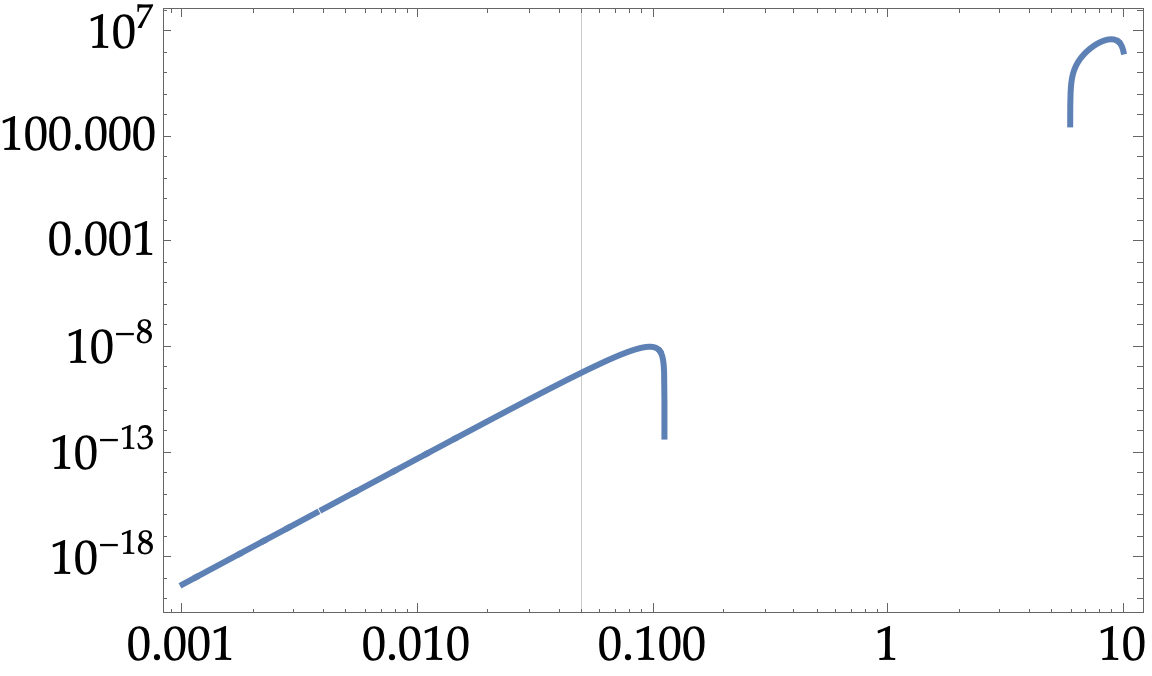

In [70]:
LogLogPlot[-xmcond[x,20],{x,10^-3,10},PlotRange->Full,WorkingPrecision->30,GridLines->{{1/20},None}]

-Graphics-
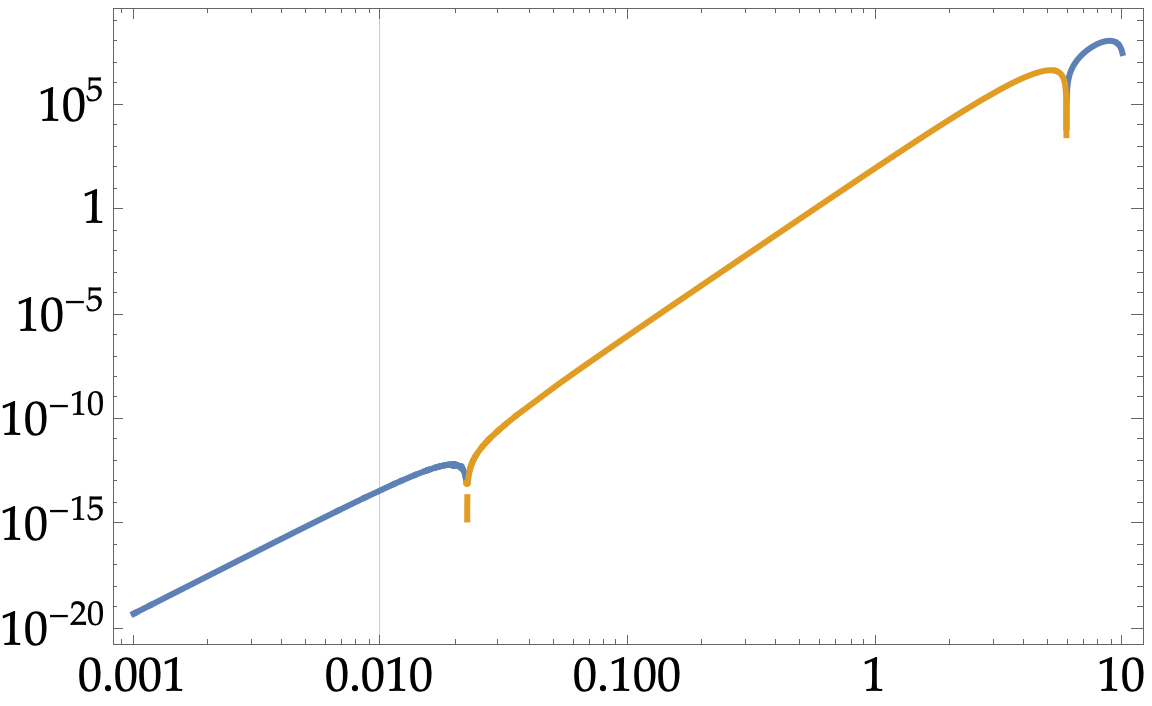

In [71]:
LogLogPlot[{-xmcond[x,100],xmcond[x,100]},{x,10^-3,10},PlotRange->Full,WorkingPrecision->30
    ,GridLines->{{1/100},None}]

Value `1` in search specification `2` is not a number or array of numbers.:                                            3.00000000000000000000000000000                                    3
Value Min[5.00000000000000000000000000000, -------------------------------] in search specification {x, Min[-----, 5]} is not a number or array of numbers.
                                                        kappa                                               kappa

FindRoot::precw:                                                    2               2                 2    4                  2    4                         2                  2
The precision of the argument function (4 (32 + 3 x  - 0.04 (12 + x )) + (-128 + 52 x  - x  + 0.02 (96 - 40 x  + x )) Cos[x] - x (128 - 11 x  + 0.06 (-32 + 3 x )) Sin[x] == 0) is less than WorkingPrecision (30.).

{x -> 5.36056534236687340079079464570}
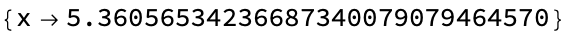

In [25]:
FindRoot[xmcond[x,kappa]==0,{x,Min[3/kappa,5]},WorkingPrecision->30] /. {kappa->0.1}

In [26]:
xmList = Table[{10^logk,x/.FindRoot[xmcond[x,10^logk]==0,{x,Min[5/10^logk,5]},WorkingPrecision->30] // Quiet}
    ,{logk,-3,2,1/100}];

In [27]:
Last[xmList][[2]] 100
First[xmList][[2]]

2.23610391498593770655394732721
5.37014187909902279530303052317

-Graphics-
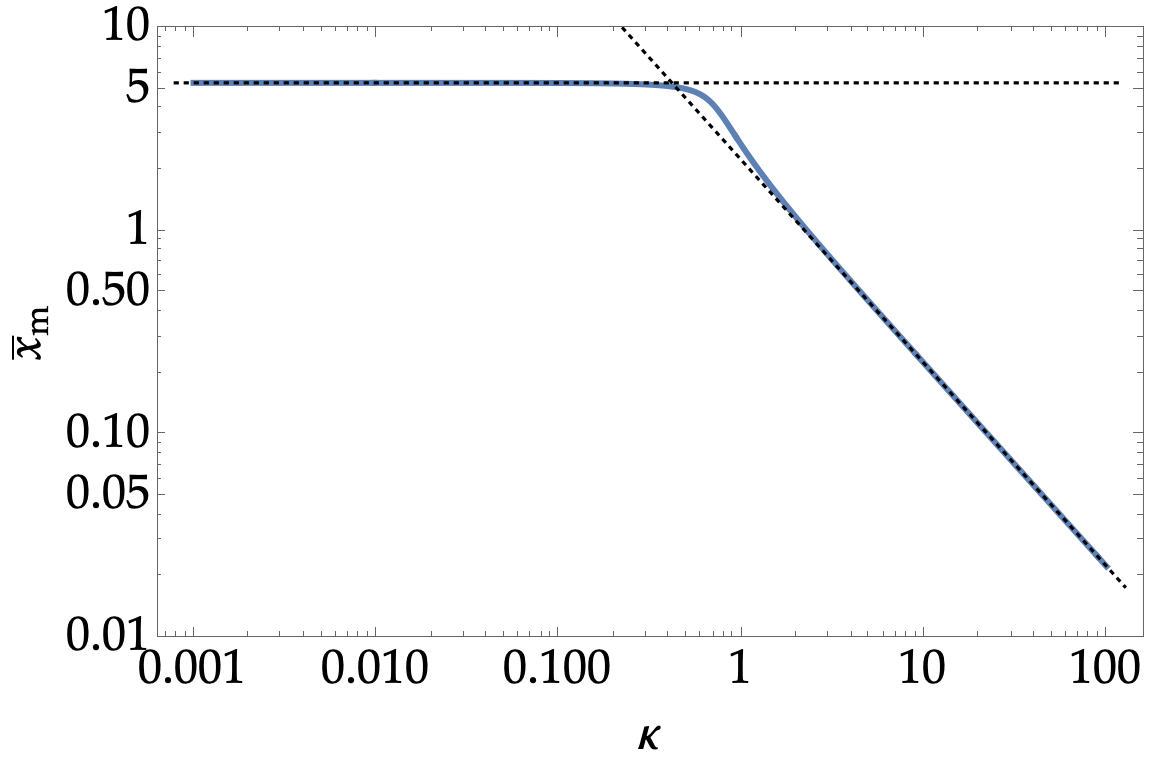

In [76]:
Figxm = 
Show[ListLogLogPlot[xmList,PlotRange->{{10^-3.2,10^2.2},{0.01,10}},FrameLabel->{\[Kappa],Subscript[OverBar[x],"m"]}]
    ,LogLogPlot[{2.24/k,5.37},{k,10^-3.1,10^2.1},PlotStyle->{{Black,Dotted}}]]

In [160]:
Export["xm_flat.pdf",Figxm];

In [29]:
xmint[kappa_] = Interpolation[xmList][kappa];

In [30]:
Cmax[mu_,kappa_] = CompactC[xmint[kappa],mu,kappa];

In [31]:
muthList = Table[{10^logk, mu /. Solve[Cmax[mu,10^logk] == 0.267, mu][[1]]},{logk,-3,2,1/100}];

In [32]:
muthint[kappa_] = Interpolation[muthList][kappa];

In [33]:
First[muthList][[2]]

0.102313

{{mu -> 0.102313}, {mu -> 0.26711}}
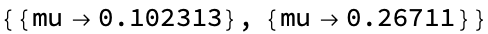

In [34]:
Solve[CompactC[5.37,mu,0] == 0.267,mu]

Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.

0.2539                 2
-0.322681 + ------ + 0.664695 kappa
                 2
            kappa
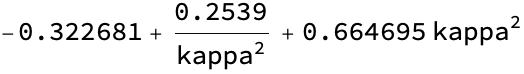

In [35]:
Normal[Series[mu /. Solve[Collect[Normal[Series[Simplify[CompactC[2.24/kappa,mu,kappa]],{kappa,\[Infinity],4}]],mu]==0.267,mu][[1]],{kappa,\[Infinity],2}]]

-Graphics-
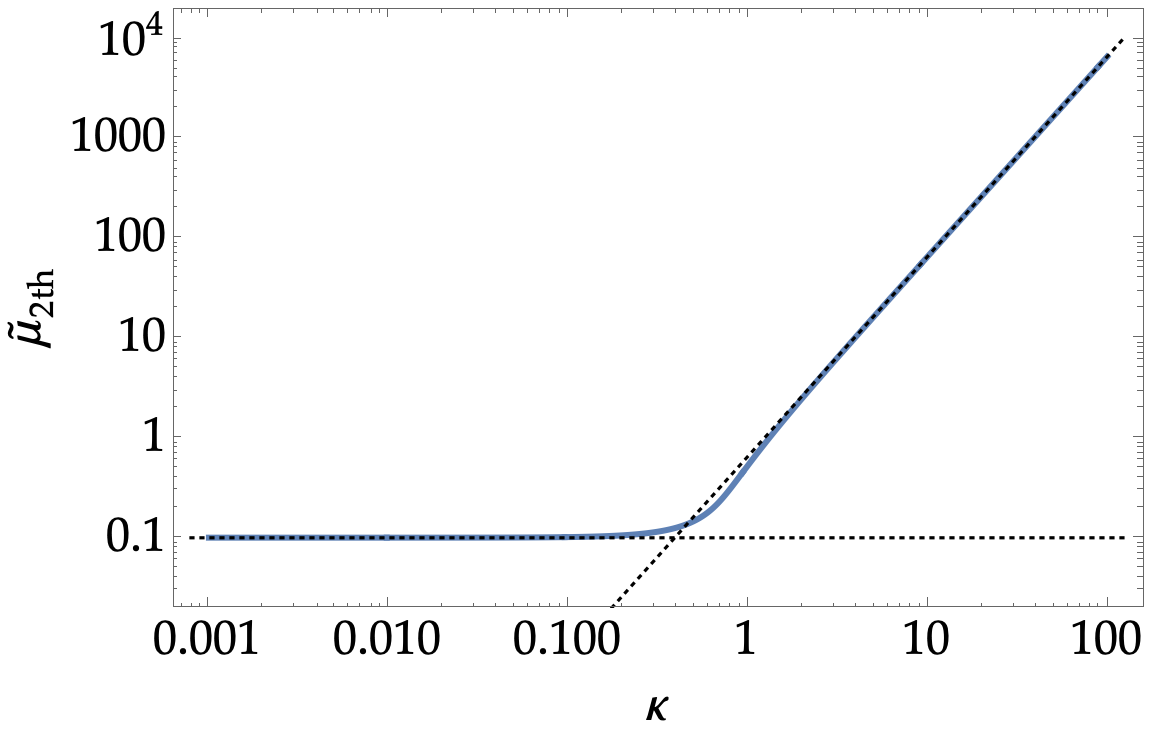

In [84]:
Figmuth = 
Show[ListLogLogPlot[muthList,FrameLabel->{\[Kappa],Subscript[OverTilde[\[Mu]],"2th"]},PlotRange->{{10^-3.2,10^2.2},{0.02,2 10^4}}]
    ,LogLogPlot[{0.102,0.665 k^2},{k,10^-3.1,10^2.1},PlotStyle->{{Black,Dotted}}]]

In [46]:
Export["muth_flat.pdf",Figmuth];

In [36]:
gm[kappa_] = zetax[xmint[kappa],mu,kappa]/mu // Simplify;

Legended[-Graphics-, Placed[LineLegend[{Directive[Opacity[1.], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[3]], 
 
>      Directive[Opacity[1.], RGBColor[0.880722, 0.611041, 0.142051], 
 
>       AbsoluteThickness[1.6], Dashing[{0, Small}]]}, {g , -g }, LegendMarkers -> None, 
                                                         m    m
 
>     LabelStyle -> Directive[GrayLevel[0], Large, FontFamily -> Palatino], 
 
>     LegendLayout -> Column], {0.2, 0.8}, Identity]]
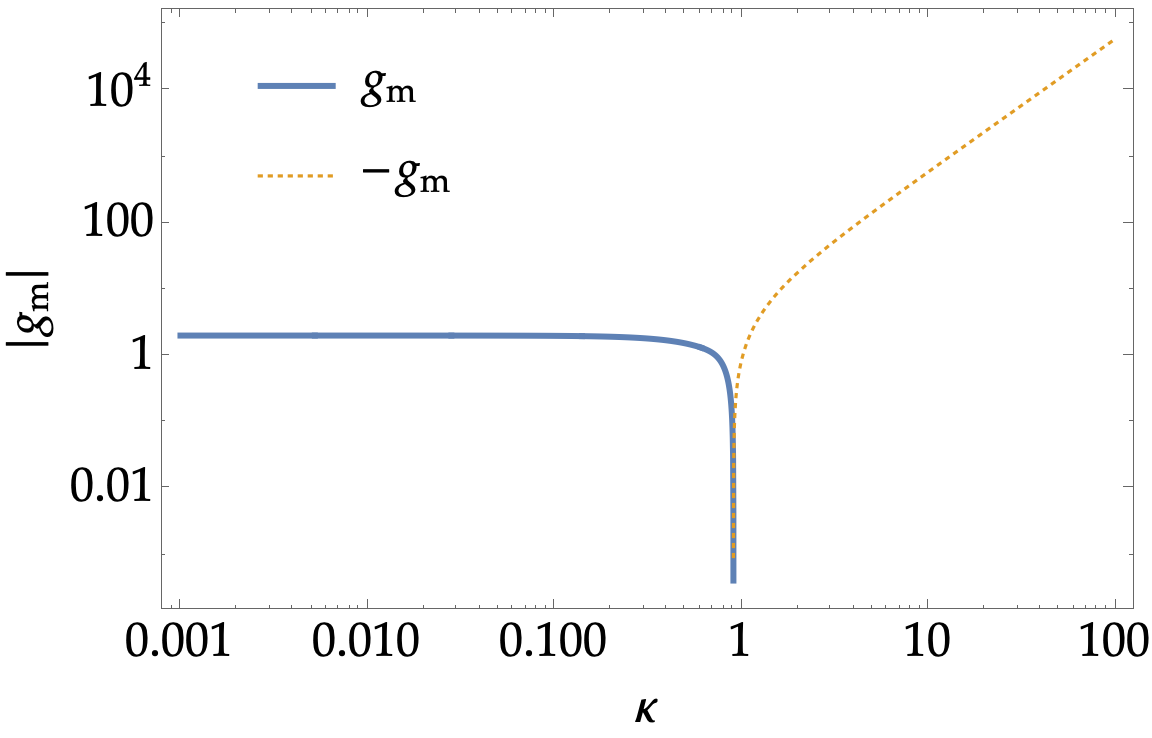

In [86]:
Figgm = 
LogLogPlot[{gm[kappa],-gm[kappa]},{kappa,10^-3,10^2},PlotRange->Full
    ,PlotStyle->{AbsoluteThickness[3],Dotted},FrameLabel->{\[Kappa],Abs[Subscript[g,"m"]]}
    ,PlotLegends->Placed[{Subscript[g,"m"],-Subscript[g,"m"]},{0.2,0.8}]]

In [231]:
Export["gm_flat.pdf",Figgm];

In [37]:
kappac = kappa/.FindRoot[gm[kappa] == 0,{kappa,1}]

0.90878

In [38]:
(6.4 10^-14)^-1

13
1.5625 10

3
3 Sqrt[-]
       2
---------
      3
 As kW
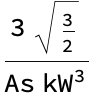

In [39]:
sigman[4,kW]^2/sigman[2,kW]/sigman[3,kW]^3

4
Sqrt[As] kW
------------
 2 Sqrt[2]
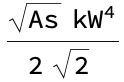

In [40]:
sigman[4,kW]

2
Sqrt[As] kW
------------
     2
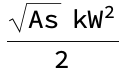

In [41]:
sigman[2,kW]

2
2 kW
-----
  3
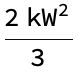

In [42]:
sigman[3,kW]^2/sigman[2,kW]^2

-Graphics-
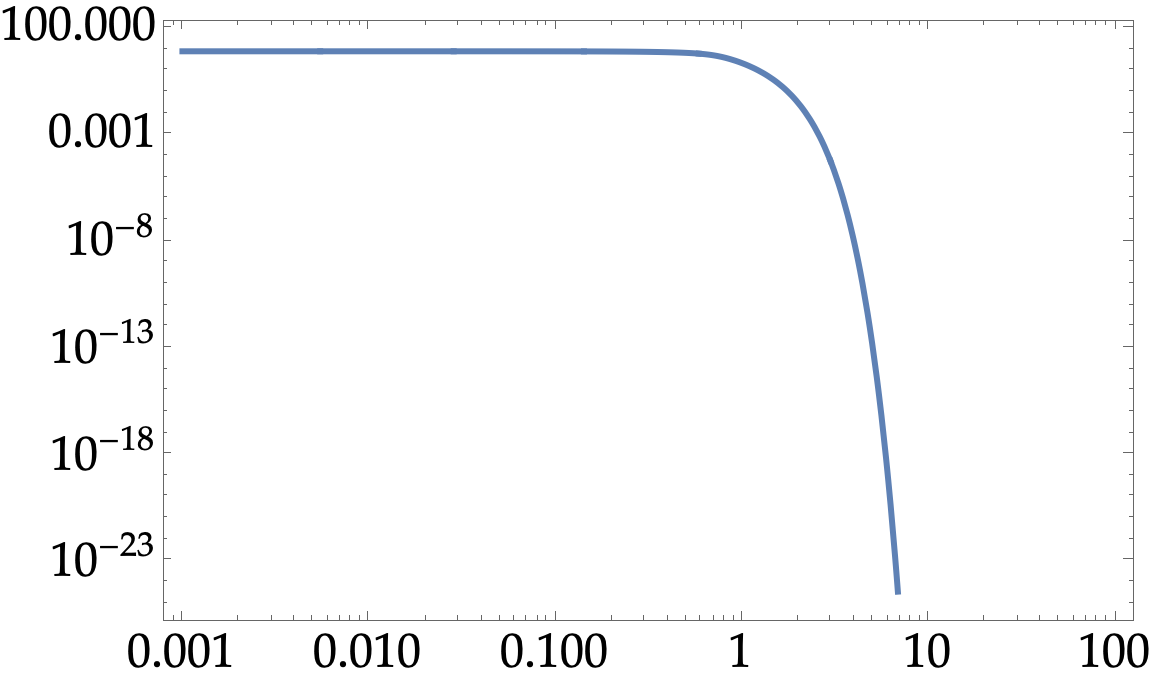

In [55]:
LogLogPlot[xmint[kappa]Exp[2 0.1 gm[kappa]],{kappa,10^-3,10^2}]

In [43]:
MoMkW[mu_,kappa_] = xmint[kappa]^2 Exp[2mu gm[kappa]];

Legended[-Graphics-, Placed[BarLegend[{Blend[M10DefaultDensityGradient, #1] & , 
 
>      {-39.2206, 54.9462}}, {{-48.4, 
 
>       Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-47.3, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-46.2, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-45.1, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-44., Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-42.9, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-41.8, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-40.7, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-39.6, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-38.5, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-37.4, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-36.3, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-35.2, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-34.1, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-33., Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-31.9, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-30.8, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-29.7, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-28.6, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-27.5, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-26.4, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-25.3, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-24.2, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-23.1, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-22., Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-20.9, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-19.8, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-18.7, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-17.6, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-16.5, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-15.4, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-14.3, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-13.2, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-12.1, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-11., Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-9.9, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-8.8, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-7.7, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-6.6, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-5.5, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-4.4, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-3.3, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-2.2, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {-1.1, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {0., Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {1.1, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {2.2, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {3.3, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {4.4, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {5.5, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {6.6, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {7.7, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {8.8, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
>      {9.9, Directive[GrayLevel[0], Opacity[0
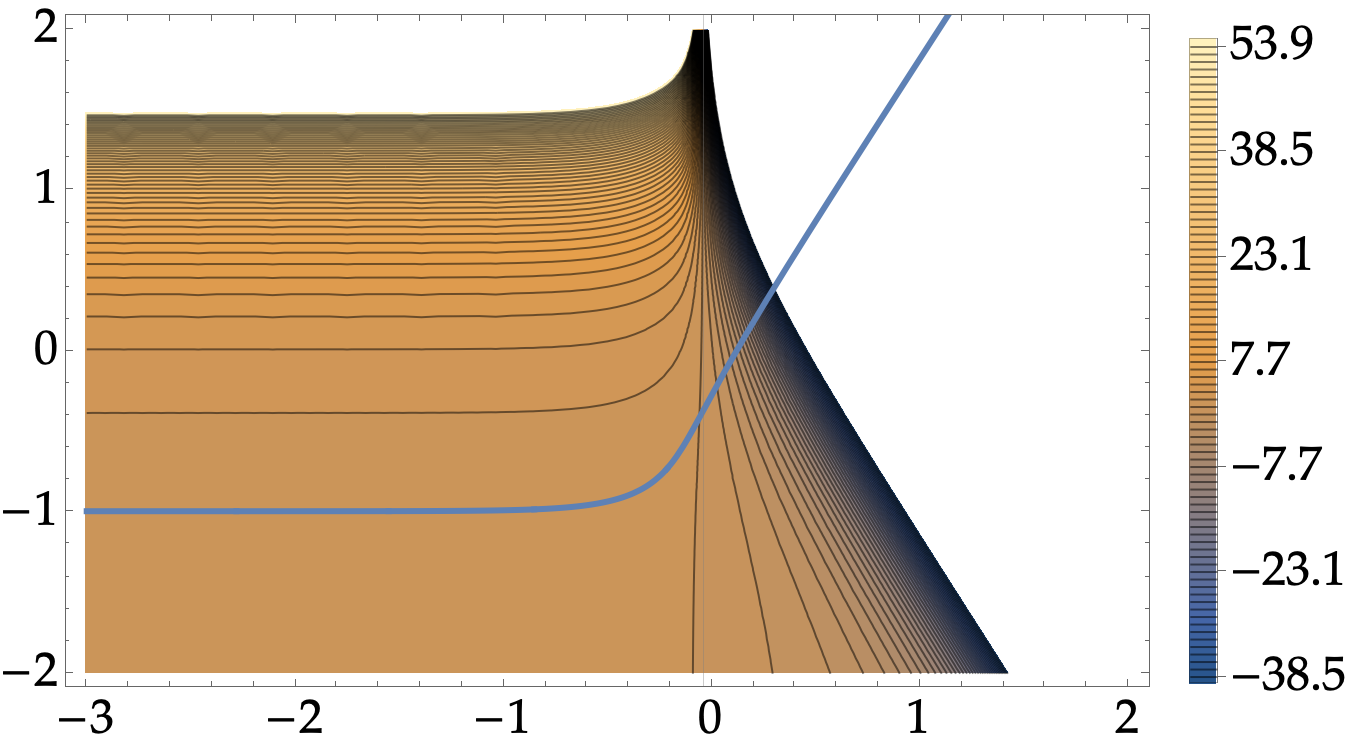

In [90]:
Show[ContourPlot[Log10[MoMkW[10^logm,10^logk]],{logk,-3,2},{logm,-2,2},Contours->100
        ,PlotLegends->Automatic,GridLines->{{Log10[kappac]},None}]
    ,Plot[Log10[muthint[10^logk]],{logk,-3,2}]]

In [44]:
MContour = Table[i,{i,-5,5,1/4}];

Legended[-Graphics-, Placed[BarLegend[{Blend[M10DefaultDensityGradient, #1] & , 
 
>      {-1.37535, 7.05817}}, {{-5, 
 
>       Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
          19
>      {-(--), Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
          4
 
          9
>      {-(-), Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
          2
 
          17
>      {-(--), Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
          4
 
>      {-4, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
          15
>      {-(--), Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
          4
 
          7
>      {-(-), Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
          2
 
          13
>      {-(--), Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
          4
 
>      {-3, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
          11
>      {-(--), Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
          4
 
          5
>      {-(-), Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
          2
 
          9
>      {-(-), Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
          4
 
>      {-2, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
          7
>      {-(-), Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
          4
 
          3
>      {-(-), Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
          2
 
          5
>      {-(-), Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
          4
 
>      {-1, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
          3
>      {-(-), Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
          4
 
          1
>      {-(-), Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
          2
 
          1
>      {-(-), Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
          4
 
>      {0, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
        1
>      {-, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
        4
 
        1
>      {-, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
        2
 
        3
>      {-, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
        4
 
>      {1, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
        5
>      {-, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
        4
 
        3
>      {-, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
        2
 
        7
>      {-, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
        4
 
>      {2, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
        9
>      {-, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
        4
 
        5
>      {-, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
        2
 
        11
>      {--, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
        4
 
>      {3, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
        13
>      {--, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
        4
 
        7
>      {-, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
        2
 
        15
>      {--, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
        4
 
>      {4, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
 
        17
>      {--, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
        4
 
        9
>      {-, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
        2
 
        19
>      {--, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}, 
        4
 
>      {5, Directive[GrayLevel[0], Opacity[0.5], CapForm[Butt]]}}, 
 
>     LabelStyle -> Directive[GrayLevel[0], Large, FontFamily -> Palatino], 
 
                             ~
                           M[μ , κ]
                              2
>     LegendLabel -> log   --------, LegendLayout -> Column, 
                        10   M
                              k
                    
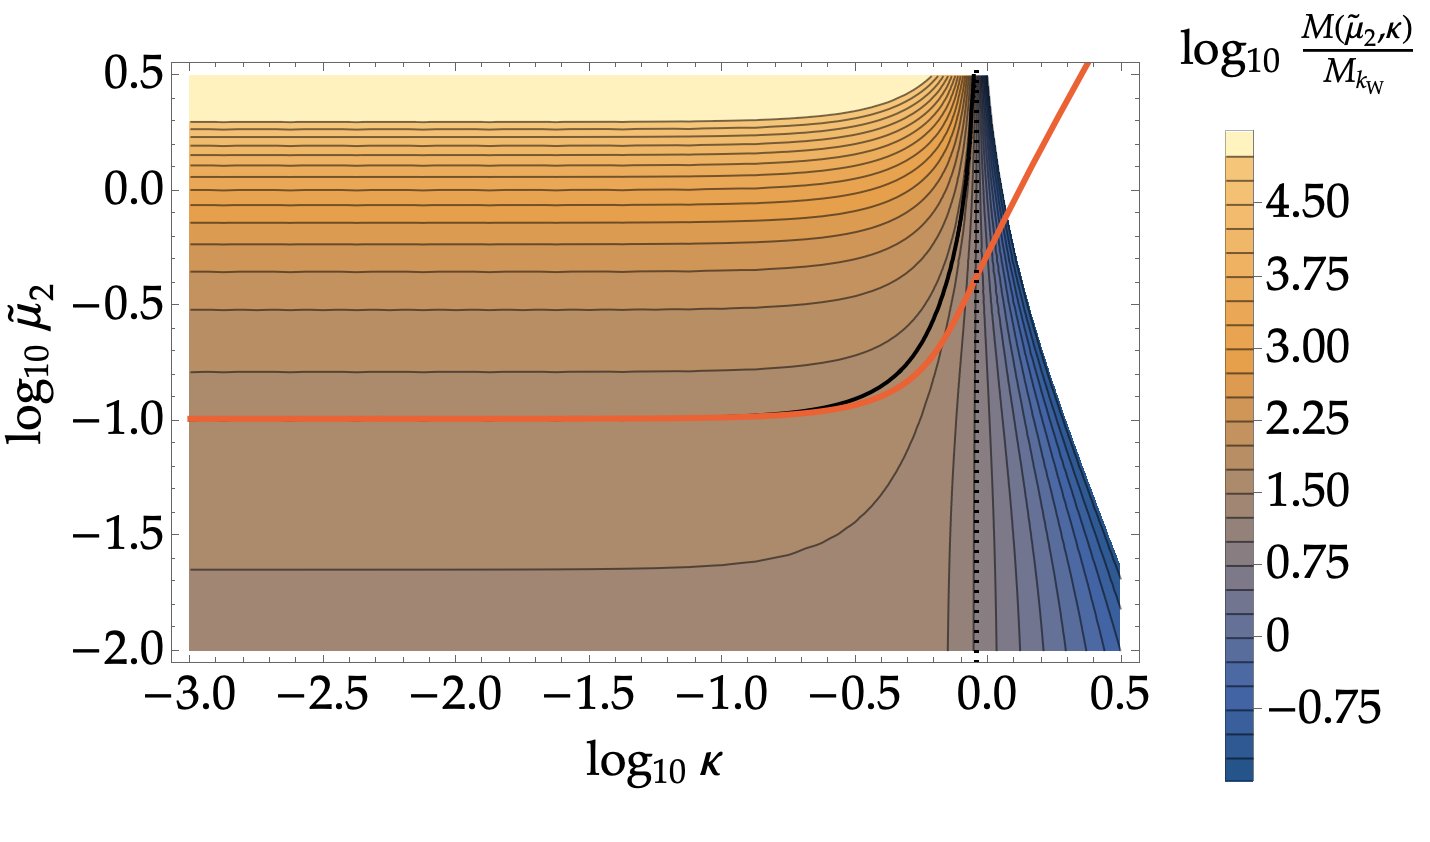

In [92]:
FigMoMkW = 
Show[ContourPlot[Log10[MoMkW[10^logm,10^logk]],{logk,-3,0.5},{logm,-2,0.5}
        ,Contours->MContour
        ,PlotLegends->BarLegend[Automatic
            ,LegendLabel->Row[{Subscript["log",10]," "
                ,M[Subscript[OverTilde[\[Mu]],2],\[Kappa]]/Subscript[M,Subscript[k,"W"]]}]]
        ,GridLines->{{Log10[kappac]},None}
        ,GridLinesStyle->Directive[Black,Dotted,AbsoluteThickness[2]]
        ,FrameLabel->{Row[{Subscript["log",10]," ",\[Kappa]}]
            ,Row[{Subscript["log",10]," ",Subscript[OverTilde[\[Mu]],2]}]}]
    ,ContourPlot[MoMkW[10^logm,10^logk] == MoMkW[muthint[10^-3],10^-3],{logk,-3,0.5},{logm,-2,0.5}
        ,ContourStyle->{Black,AbsoluteThickness[2]}]
    ,Plot[Log10[muthint[10^logk]],{logk,-3,2},PlotStyle->{AbsoluteThickness[3],Color[[4]]}]]

In [111]:
Export["MoMkW_flat.pdf",FigMoMkW];

In [45]:
Mc = MoMkW[0.1,kappac]
Mth = MoMkW[muthint[10^-3],10^-3]

9.17143
43.762

In [47]:
muthint[0.001]

0.102313

In [48]:
muM[kappa_,MM_] = 1/2/gm[kappa] Log[MM/xmint[kappa]^2];

In [49]:
muM[10^-0.5,30]

0.0221091

{kappa -> 0.701322}
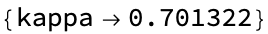

In [50]:
FindRoot[muM[kappa,30] == muthint[kappa],{kappa,0.7}]

{kappa -> 1.28126}
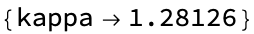

In [51]:
FindRoot[muM[kappa,0.001] == muthint[kappa],{kappa,2}]

In [52]:
kappathList1 = Table[{10^logM,kappa/.FindRoot[muM[kappa,10^logM]==muthint[kappa],{kappa,0.908}]},{logM,Log10[Mc]+1/1000,Log10[Mth],1/100}];

-Graphics-
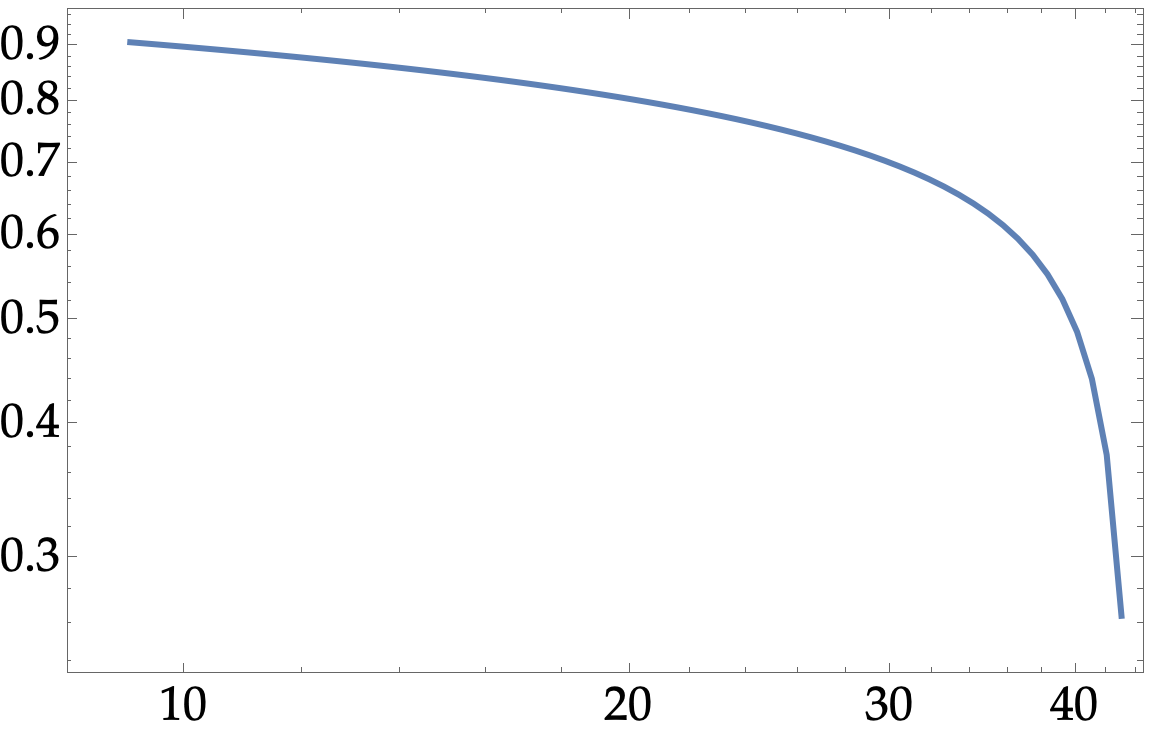

In [101]:
ListLogLogPlot[kappathList1]

In [53]:
kappathList2 = Table[{10^logM,kappa/.FindRoot[muM[kappa,10^logM]==muthint[kappa],{kappa,0.91}]},{logM,-3,Log10[Mc],1/100}];

-Graphics-
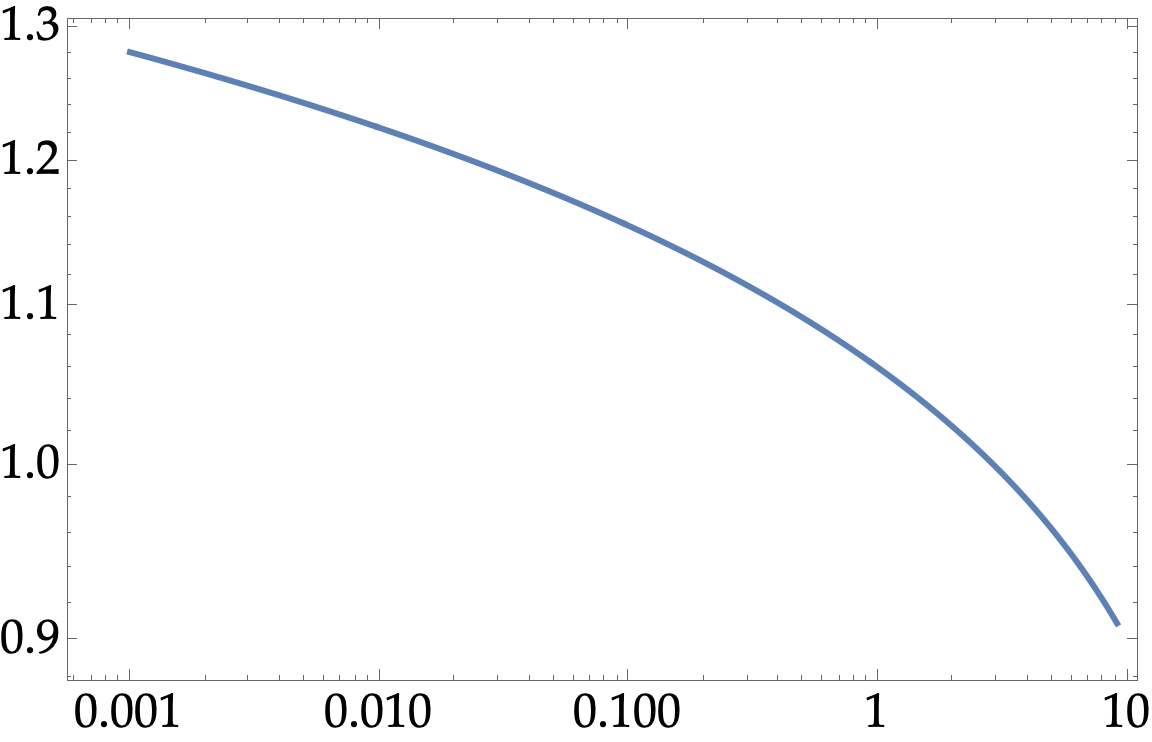

In [103]:
ListLogLogPlot[kappathList2]

-Graphics-
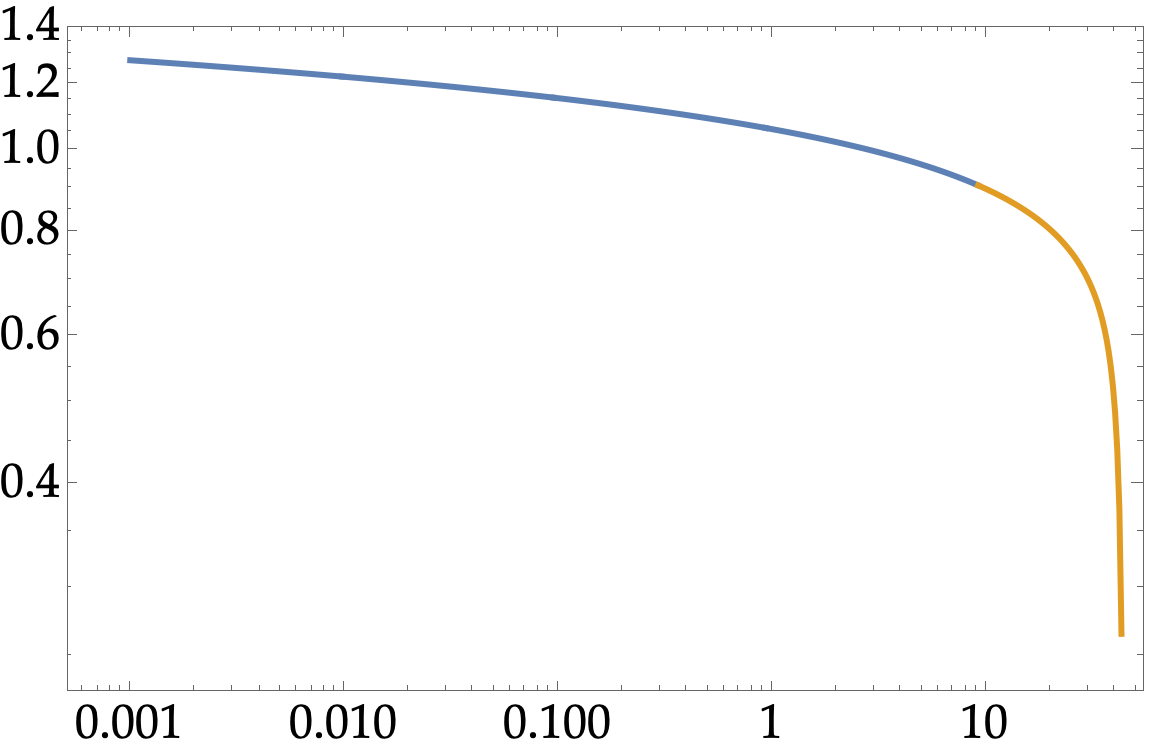

In [104]:
ListLogLogPlot[{kappathList2,kappathList1}]

In [54]:
kappathList = Join[kappathList2,kappathList1];

-Graphics-
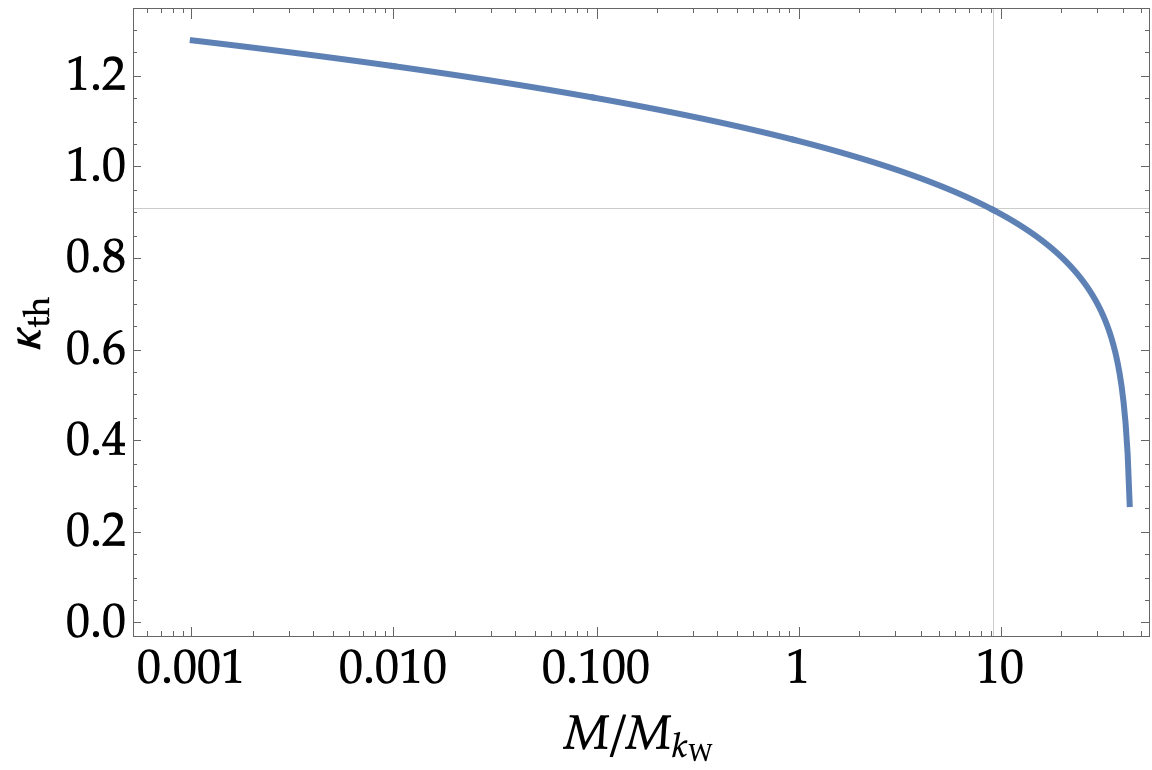

In [106]:
Figkappath =
ListLogLinearPlot[kappathList,FrameLabel->{Row[{M,"/",Subscript[M,Subscript[k,"W"]]}],Subscript[\[Kappa],"th"]},GridLines->{{Mc},{kappac}}]

In [231]:
Export["kappath_flat.pdf",Figkappath];

In [55]:
kappathint[MM_] = Interpolation[kappathList][MM];

In [56]:
f[z_] = 1/2 z(z^2-3)(Erf[1/2 Sqrt[5/2]z]+Erf[Sqrt[5/2]z]) + 
    Sqrt[2/5/\[Pi]]((8/5+31/4 z^2)Exp[-5/8 z^2] + (-8/5+1/2 z^2)Exp[-5/2 z^2] );
PG[z_,m_,s2_] = 1/Sqrt[2\[Pi] s2] Exp[-(z-m)^2/2/s2];

In [58]:
npk[mu_,kappa_,As_] = 1/(2\[Pi])^(3/2) 27Sqrt[3]/8 f[2Sqrt[2] mu kappa^2/Sqrt[As]] PG[mu,0,As/8] PG[kappa^2,2/3,As/24/mu^2] kappa;

In [59]:
npk[0.1,0.1,0.01]

-18
2.62086 10

In [60]:
nPBH[MM_,As_] := NIntegrate[2gm[kappa]npk[muM[kappa,MM],kappa,As],{kappa,kappac,kappathint[MM]}] /; MM<Mc
nPBH[MM_,As_] := NIntegrate[2gm[kappa]npk[muM[kappa,MM],kappa,As],{kappa,kappathint[MM],kappac}] /; Mc<MM<Mth
nPBH[MM_,As_] := NIntegrate[2gm[kappa]npk[muM[kappa,MM],kappa,As],{kappa,0,kappac}] /; MM>Mth

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.:                   16/25
Input value {10 10     } lies outside the range of data in the interpolating function. Extrapolation will be used.

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.:                   16/25
Input value {10 10     } lies outside the range of data in the interpolating function. Extrapolation will be used.

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.:                   16/25
Input value {10 10     } lies outside the range of data in the interpolating function. Extrapolation will be used.

Further output of `1` will be suppressed during this calculation.: Further output of InterpolatingFunction::dmval will be suppressed during this calculation.

{546.773, Null}
{545.924, Null}
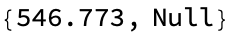
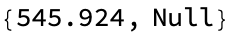

In [118]:
nPBHList1 = Table[{10^logM,nPBH[10^logM,0.01]},{logM,1,2,1/100}]; // AbsoluteTiming
nPBHList2 = Table[{10^logM,nPBH[10^logM,0.0028]},{logM,1,2,1/100}]; // AbsoluteTiming

In [120]:
Export["nPBH1e-2.dat",nPBHList1];
Export["nPBH28e-4.dat",nPBHList2];

In [75]:
nPBHList1 = Import["nPBH1e-2.dat"] // ToExpression;
nPBHList2 = Import["nPBH28e-4.dat"] // ToExpression;

In [77]:
gineV = (1.783 10^-33)^-1;
MpcinvineV = (10^6 3.086 10^16)^-1 1.973 10^-7;
KineV = (1.16 10^4)^-1;
MplineV = 2.435 10^(18+9);
kminvsinvMpcineV = 10^3 6.582 10^-16 / (3.086 10^16 10^6);

In [82]:
n2f = (10^20 gineV (1.56 10^13 MpcinvineV)^3 / (0.12 3 MplineV^2 (100 kminvsinvMpcineV)^2) )^-1

-16
1.74505 10

In [83]:
LognPBHList1 = Map[Log10,nPBHList1,{2}] // Simplify;
LognPBHList2 = Map[Log10,nPBHList2,{2}] // Simplify;

In [85]:
nPBHint1[MM_] = 10^Interpolation[LognPBHList1][Log10[MM]];
nPBHint2[MM_] = 10^Interpolation[LognPBHList2][Log10[MM]];

Legended[-Graphics-, Placed[LineLegend[{Directive[Opacity[1.], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[3]], 
 
>      Directive[Opacity[1.], RGBColor[0.880722, 0.611041, 0.142051], 
 
>       AbsoluteThickness[1.6], Dashing[{Small, Small}]]}, 
 
                     -3          -2
>     {A  == 2.8 × 10  , A  == 10  }, LegendMarkers -> None, 
        ζ                 ζ
 
>     LabelStyle -> Directive[Larger, GrayLevel[0], FontFamily -> Palatino], 
 
>     LegendLayout -> Column], {0.25, 0.2}, Identity]]
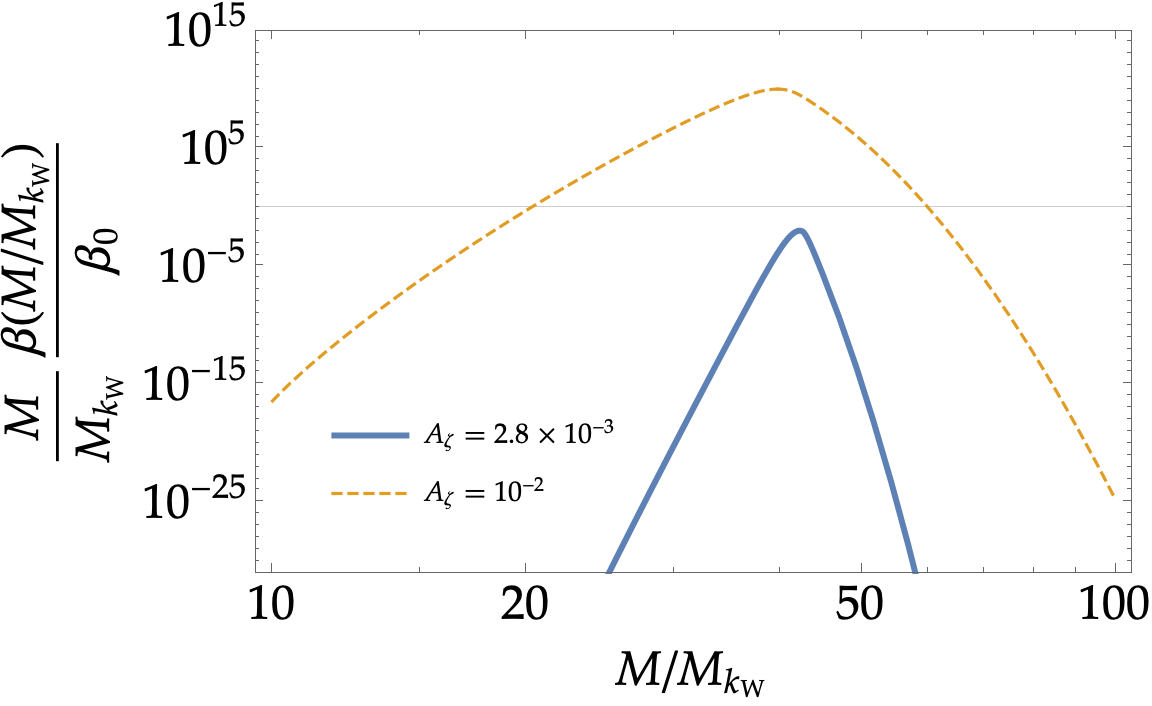

In [139]:
FigBeta = 
LogLogPlot[{MM nPBHint2[MM]/n2f,MM nPBHint1[MM]/n2f},{MM,10,100},PlotRange->{10^-31,10^15},GridLines->{None,{1}}
    ,FrameLabel->{Row[{M,"/",Subscript[M,Subscript[k,"W"]]}],Row[{M/Subscript[M,Subscript[k,"W"]],\[Beta][Row[{M,"/",Subscript[M,Subscript[k,"W"]]}]]/Subscript[\[Beta],0]}]}
    ,PlotStyle->{AbsoluteThickness[3],Dashed}
    ,PlotLegends->Placed[LineLegend[{Row[{Subscript[A,\[Zeta]]==2.8," \[Times] ",Superscript[10,-3]}],Subscript[A,\[Zeta]]==Superscript[10,-2]}
                            ,LabelStyle->Directive[Larger,Black,FontFamily->"Palatino"]],{0.25,0.2}]]

In [102]:
Export["beta_flat.pdf",FigBeta];

In [103]:
MaxfPBH = FindMaximum[MM nPBHint2[MM]/n2f,{MM,40}][[1]]
MaxMM = MM /. FindMaximum[MM nPBHint2[MM]/n2f,{MM,40}][[2]]

The line search decreased the step size to within the tolerance specified by AccuracyGoal and PrecisionGoal but was unable to find a sufficient increase in the function. You may need more than `1` digits of working precision to meet these tolerances.: The line search decreased the step size to within the tolerance specified by AccuracyGoal and PrecisionGoal but was unable to find a sufficient increase in the function. You may need more than MachinePrecision digits of working precision to meet these tolerances.

The line search decreased the step size to within the tolerance specified by AccuracyGoal and PrecisionGoal but was unable to find a sufficient increase in the function. You may need more than `1` digits of working precision to meet these tolerances.: The line search decreased the step size to within the tolerance specified by AccuracyGoal and PrecisionGoal but was unable to find a sufficient increase in the function. You may need more than MachinePrecision digits of working precision to meet these tolerances.

0.0115842
42.2278

In [114]:
mu2mono[M_] = Log[M/10^20]/0.28;

In [115]:
mu2monoth = 0.521;

In [122]:
fPBHmono[M_,As_] = (M/10^20) (f[mu2mono[M]/Sqrt[As]]PG[mu2mono[M],0,As] /(7.1 10^-18) ) UnitStep[mu2mono[M]-mu2monoth];

In [133]:
NIntegrate[fPBHmono[E^logm 10^20,2.8 10^-3],{logm,0,10}]

0.00155557

`1` is too small to represent as a normalized machine number; precision may be lost.: Exp[-12074.6] is too small to represent as a normalized machine number; precision may be lost.

`1` is too small to represent as a normalized machine number; precision may be lost.: Exp[-60373.2] is too small to represent as a normalized machine number; precision may be lost.

`1` is too small to represent as a normalized machine number; precision may be lost.: Exp[-15093.3] is too small to represent as a normalized machine number; precision may be lost.

Further output of `1` will be suppressed during this calculation.: Further output of General::munfl will be suppressed during this calculation.

-Graphics-
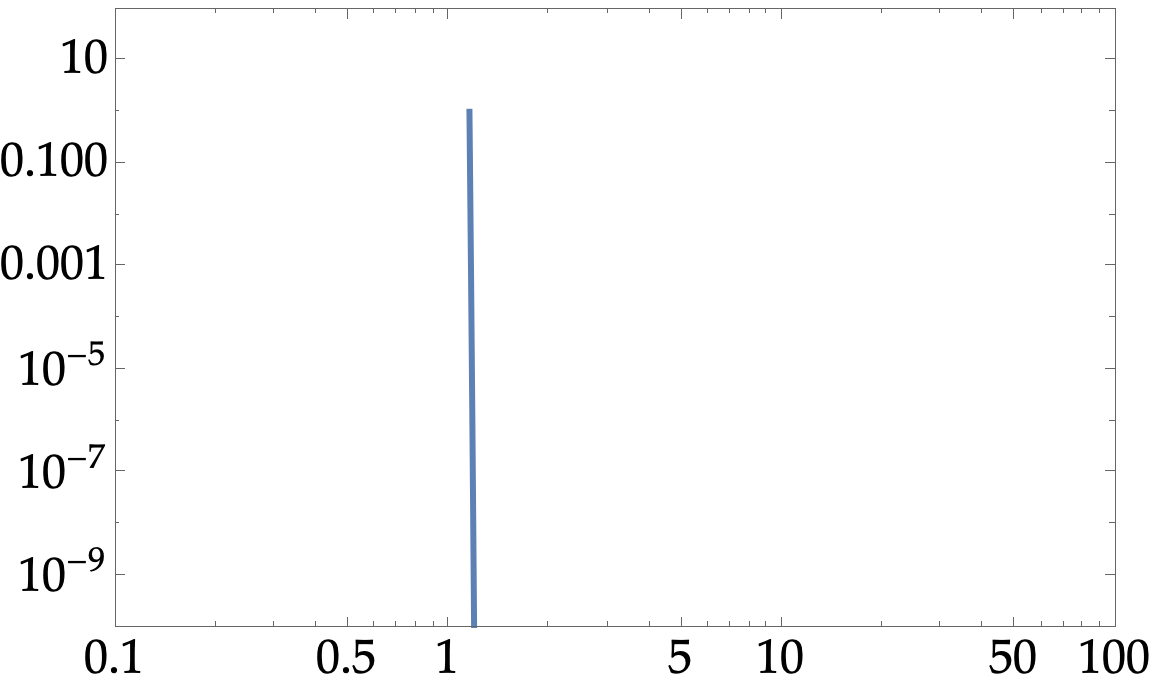

In [131]:
LogLogPlot[fPBHmono[MM 10^20,2.8 10^-3],{MM,0.1,100},PlotRange->{{0.1,100},{10^-10,100}}]

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.: Input value {0.0000612857} lies outside the range of data in the interpolating function. Extrapolation will be used.

`1` is too small to represent as a normalized machine number; precision may be lost.:   -2797.23
10         is too small to represent as a normalized machine number; precision may be lost.

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.: Input value {0.0612858} lies outside the range of data in the interpolating function. Extrapolation will be used.

`1` is too small to represent as a normalized machine number; precision may be lost.:   -2376.04
10         is too small to represent as a normalized machine number; precision may be lost.

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.: Input value {0.12251} lies outside the range of data in the interpolating function. Extrapolation will be used.

Further output of `1` will be suppressed during this calculation.: Further output of InterpolatingFunction::dmval will be suppressed during this calculation.

`1` is too small to represent as a normalized machine number; precision may be lost.:   -2002.41
10         is too small to represent as a normalized machine number; precision may be lost.

Further output of `1` will be suppressed during this calculation.: Further output of General::munfl will be suppressed during this calculation.

-Graphics-
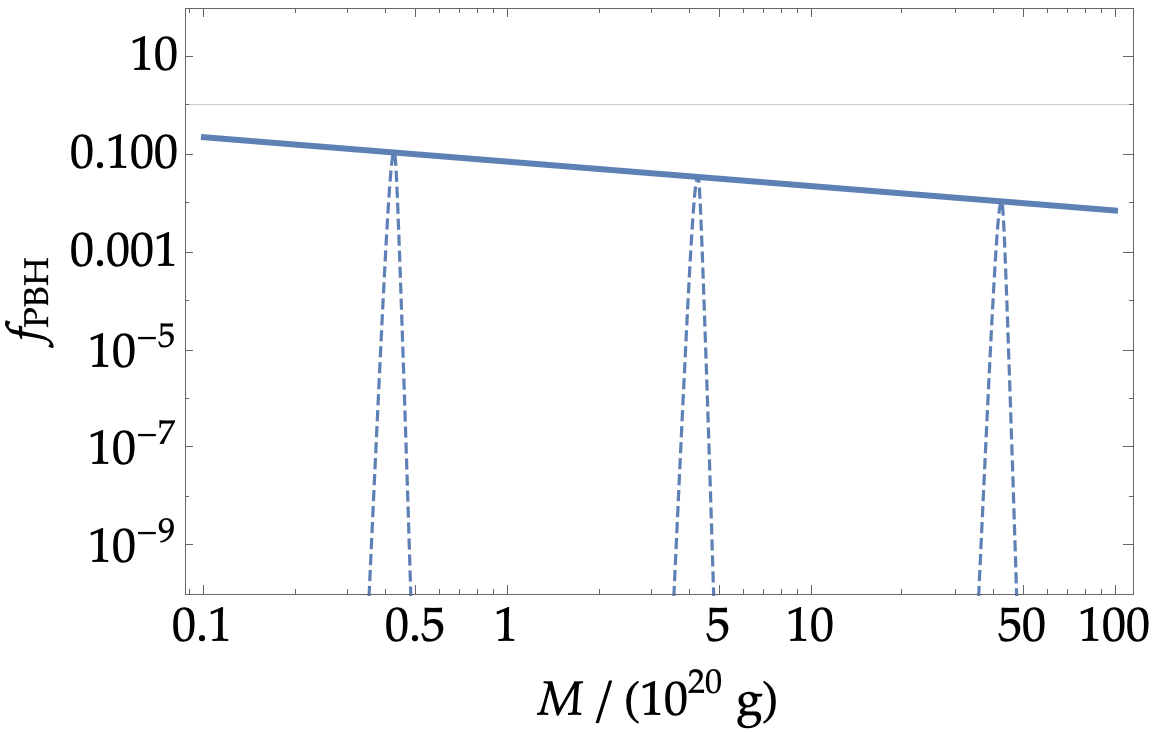

In [140]:
FigfPBH = 
LogLogPlot[{0.01^-0.5 MM/0.01 nPBHint2[MM/0.01]/n2f,0.1^-0.5 MM/0.1 nPBHint2[MM/0.1]/n2f,1^-0.5 MM/1 nPBHint2[MM/1]/n2f
        ,MaxfPBH (MM/MaxMM)^(-1/2)},{MM,0.1,100}
    ,PlotRange->{10^-10,100},GridLines->{None,{1}},PlotStyle->{Dashed,{Color[[1]],Dashed},{Color[[1]],Dashed},{Color[[1]],AbsoluteThickness[3]}}
    ,FrameLabel->{Row[{M," / (",Superscript[10,20]," g)"}],Subscript[f,"PBH"]}]

In [141]:
Export["fPBH_flat.pdf",FigfPBH];

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.: Input value {0.62566} lies outside the range of data in the interpolating function. Extrapolation will be used.

`1` is too small to represent as a normalized machine number; precision may be lost.:   -354.205
10         is too small to represent as a normalized machine number; precision may be lost.

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.: Input value {0.686885} lies outside the range of data in the interpolating function. Extrapolation will be used.

Input value `1` lies outside the range of data in the interpolating function. Extrapolation will be used.: Input value {0.62566} lies outside the range of data in the interpolating function. Extrapolation will be used.

Further output of `1` will be suppressed during this calculation.: Further output of InterpolatingFunction::dmval will be suppressed during this calculation.

`1` is too small to represent as a normalized machine number; precision may be lost.:   -354.205
10         is too small to represent as a normalized machine number; precision may be lost.

`1` is too small to represent as a normalized machine number; precision may be lost.:   -354.205
10         is too small to represent as a normalized machine number; precision may be lost.

Further output of `1` will be suppressed during this calculation.: Further output of General::munfl will be suppressed during this calculation.

-Graphics-
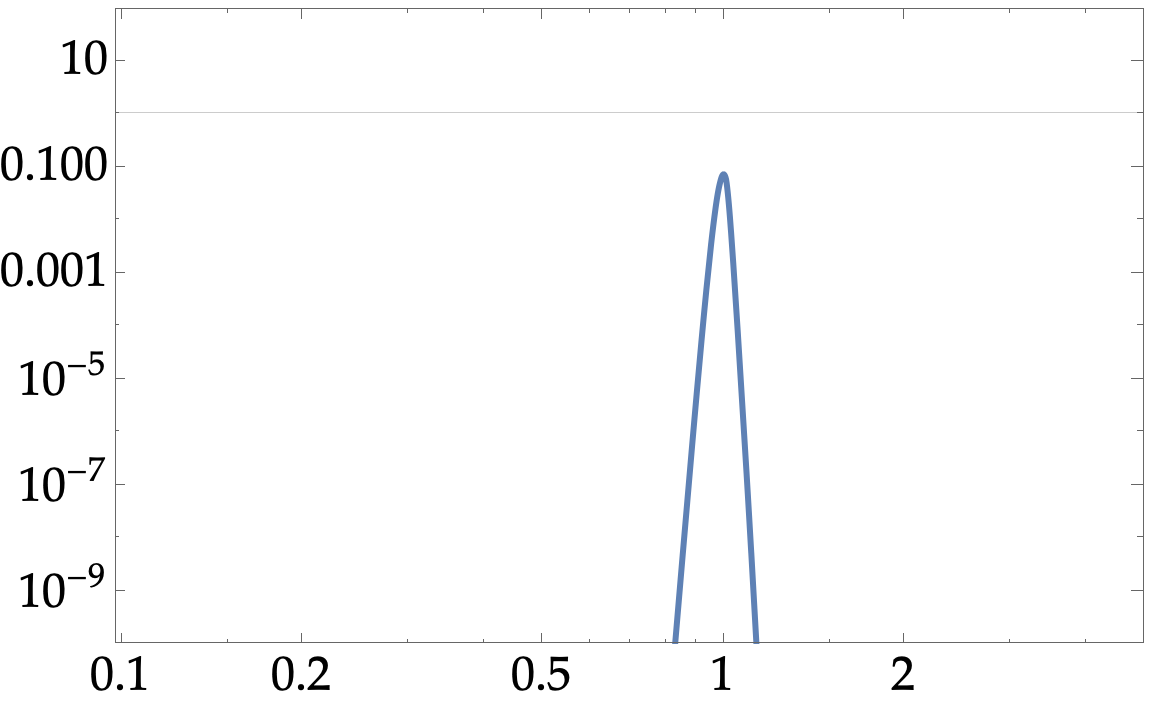

In [135]:
LogLogPlot[{(1/MaxMM)^-0.5 MM/(1/MaxMM) nPBHint2[MM/(1/MaxMM)]/n2f},{MM,0.1,100},PlotRange->{10^-10,100},GridLines->{None,{1}}]

In [136]:
NIntegrate[(1/MaxMM)^-0.5 MM/(1/MaxMM) nPBHint2[MM/(1/MaxMM)]/n2f 1/MM,{MM,0.5,2}]

0.00288779